**<p align="center">Bioingenieria</p>**

**<p align="center">Bioseñales</p>**

**<p align="center">Proyecto 4</p>**

<p align="center">Orma Jesús Contreras Mulford.</p>

<p align="center">Maria Camila Melan Guerra.</p>

El siguiente proyecto tiene como objetivo pricipal poner en practica los conocimientos teóricos aprendidos en clase acerca de la inteligencia artificial

In [1]:
import os
import pandas as pd
#importación de librerias
import numpy as np;
#libreria para graficar
#tipo matlab: pyplot
#objetual: figure, axes
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;
import scipy.io as sio;
import numpy as np;
import glob
import pandas as pd
import math
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro, levene, kruskal


In [2]:
data_folder = r'C:\Users\ORMAN\Desktop\Bioseñales\Proyecto\EMG_data_for_gestures-master' # Carpeta principal
#data_folder = r'c:\Users\famil\OneDrive\Escritorio\Bioseñales\Proyecto1\EMG_data_for_gestures-master'
all_data = []  # Lista para almacenar los datos de todos los sujetos

# Iterar sobre cada carpeta numerada
for subject_folder in os.listdir(data_folder):
    subject_path = os.path.join(data_folder, subject_folder)
    if os.path.isdir(subject_path):
        # Iterar sobre los archivos de datos en cada carpeta de sujeto
        for data_file in os.listdir(subject_path):
            if data_file.endswith('.txt') and data_file.startswith('1_raw'):
                file_path = os.path.join(subject_path, data_file)
                # Leer el archivo de datos y convertirlo en un DataFrame de Pandas
                data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
                data.columns = ['tiempo'] + [f'canal_{i}' for i in range(1, 9)] + ['clase']
                data['sujeto'] = int(subject_folder)
                all_data.append(data)

# Concatenar todos los DataFrames en uno solo
all_data = pd.concat(all_data, ignore_index=True)

# Imprimir el DataFrame combinado
all_data

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_19488\2195084407.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_19488\2195084407.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_19488\2195084407.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_19488\2195084407.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv i

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195967,54833,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195968,54834,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195969,54835,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36


In [3]:
all_data.columns

Index(['tiempo', 'canal_1', 'canal_2', 'canal_3', 'canal_4', 'canal_5',
       'canal_6', 'canal_7', 'canal_8', 'clase', 'sujeto'],
      dtype='object')

In [4]:
df_tkeo=all_data.copy()

In [5]:
df_tkeo

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195967,54833,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195968,54834,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195969,54835,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36


In [6]:
# Función para aplicar el operador Teager-Kaiser Energy Operator (TKEO) a una señal
def tkeo(signal):
    tkeo_signal = signal**2 - np.roll(signal, 1) * np.roll(signal, -1)
    return tkeo_signal

In [7]:
def apply_tkeo(data):
    tkeo_data = data.copy()
    for col in tkeo_data.columns[2:-2]:  # Excluir la columna 'tiempo','clase' y 'sujeto'
        tkeo_data[col] = tkeo(tkeo_data[col])
    return tkeo_data

In [8]:
df_tkeo = apply_tkeo(all_data) # Datos aplicando el operador

In [9]:
df_tkeo

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-6.000000e-10,-7.000000e-10,-9.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
1,5,0.00001,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10,0.0,1
2,6,-0.00001,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10,0.0,1
3,7,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
4,8,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,36
2195967,54833,-0.00004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,36
2195968,54834,-0.00004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,36
2195969,54835,-0.00004,6.000000e-10,0.000000e+00,1.120000e-08,-2.000000e-10,0.000000e+00,2.000000e-10,0.000000e+00,0.0,36


In [10]:
def rms(signal):
    return np.sqrt(np.mean(signal**2))

def variance(signal):
    return np.var(signal)

def mean_absolute_value(signal):
    return np.mean(np.abs(signal))

def mean_absolute_value_slope(signal):
    return np.mean(np.diff(np.abs(signal)))

def slope_sign_changes(signal):
    return np.sum(np.diff(np.sign(np.diff(signal))) != 0)

def wave_form_length(signal):
    return np.sum(np.abs(np.diff(signal)))

def zero_crossings(signal):
    return np.sum(np.diff(np.sign(signal)) != 0)

def extract_features(signal_multicanal):
    num_canales = signal_multicanal.shape[1]
    features = []
    for canal in range(num_canales):
        rms_val = rms(signal_multicanal[:, canal])
        var_val = variance(signal_multicanal[:, canal])
        mav_val = mean_absolute_value(signal_multicanal[:, canal])
        mav_slope_val = mean_absolute_value_slope(signal_multicanal[:, canal])
        ssc_val = slope_sign_changes(signal_multicanal[:, canal])
        wfl_val = wave_form_length(signal_multicanal[:, canal])
        zc_val = zero_crossings(signal_multicanal[:, canal])
        features.extend([rms_val, var_val, mav_val, mav_slope_val, ssc_val, wfl_val, zc_val])
    return np.array(features)

In [11]:
# Ordenar el DataFrame original por la columna 'clase'
df_ordenado = all_data.sort_values(by='clase')

# Diccionario para almacenar los resultados
resultados = []

# Iterar sobre los grupos definidos por los valores de la columna 'clase'
for clase, grupo in df_ordenado.groupby('clase'):
    # Iterar sobre las columnas de interés (de la 2 a la 9)
    for columna in all_data.columns[1:9]:
        canal = grupo[columna]
        
        # Aplicar las características a cada canal
        caracteristicas = {
            'clase': clase,
            'canal': columna,
            'rms': rms(canal),
            'variance': variance(canal),
            'mean_absolute_value': mean_absolute_value(canal),
            'mean_absolute_value_slope': mean_absolute_value_slope(canal),
            'slope_sign_changes': slope_sign_changes(canal),
            'wave_form_length': wave_form_length(canal),
            'zero_crossings': zero_crossings(canal)
        }
        
        # Añadir los resultados a la lista
        resultados.append(caracteristicas)

# Convertir la lista de diccionarios en un DataFrame
df_resultados = pd.DataFrame(resultados)

# El DataFrame df_resultados ahora contiene los resultados de las características para cada grupo de la columna 'clase', cada canal y sujeto.
df_resultados  # Muestra las primeras filas del DataFrame de resultados


,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings
0,0.0,canal_1,0.000147,2.145317e-08,0.000066,4.797408e-24,460388,32.81996,192333
1,0.0,canal_2,0.000112,1.238486e-08,0.000053,6.954543e-12,470555,26.63471,195603
2,0.0,canal_3,0.000120,1.432750e-08,0.000065,-5.681017e-24,478332,32.74392,196883
3,0.0,canal_4,0.000202,4.087466e-08,0.000105,-1.390909e-11,479059,52.92738,192431
4,0.0,canal_5,0.000242,5.855764e-08,0.000134,4.062245e-24,477509,66.05438,186178
...,...,...,...,...,...,...,...,...,...
59,7.0,canal_4,0.000130,1.682793e-08,0.000095,2.822467e-09,2816,0.28266,1161
60,7.0,canal_5,0.000360,1.297535e-07,0.000281,-9.031894e-08,2833,0.79228,1058
61,7.0,canal_6,0.000329,1.084446e-07,0.000233,2.822467e-09,2842,0.70952,1127
62,7.0,canal_7,0.000083,6.788920e-09,0.000063,8.467401e-09,2772,0.18290,1083


In [12]:
resultados_1= pd.DataFrame(resultados)

resultados_1.to_csv('output.csv', index=False)

In [13]:
#Ordenar Dataframe Tkeo
df_ordenado_tkeo = df_tkeo.sort_values(by='clase')

# Diccionario para almacenar los resultados
resultados_tkeo = []

# Iterar sobre los grupos definidos por los valores de la columna 'clase'
for clase, grupo in df_ordenado_tkeo.groupby('clase'):
    # Iterar sobre las columnas de interés (de la 2 a la 9)
    for columna in df_tkeo.columns[1:9]:
        canal = grupo[columna]
        
        # Aplicar las características a cada canal
        caracteristicas = {
            'sujeto': grupo['sujeto'].iloc[0],  # Tomamos el valor del sujeto del primer elemento del grupo
            'clase': clase,
            'canal': columna,
            'rms': rms(canal),
            'variance': variance(canal),
            'mean_absolute_value': mean_absolute_value(canal),
            'mean_absolute_value_slope': mean_absolute_value_slope(canal),
            'slope_sign_changes': slope_sign_changes(canal),
            'wave_form_length': wave_form_length(canal),
            'zero_crossings': zero_crossings(canal)
        }
        
        # Añadir los resultados a la lista
        resultados_tkeo.append(caracteristicas)

# Convertir la lista de diccionarios en un DataFrame
df_resultados_tkeo = pd.DataFrame(resultados_tkeo)

# El DataFrame df_resultados ahora contiene los resultados de las características para cada grupo de la columna 'clase', cada canal y sujeto.
df_resultados_tkeo  # Muestra las primeras filas del DataFrame de resultados

,sujeto,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings
0,1,0.0,canal_1,1.466615e-04,2.145317e-08,6.563766e-05,4.797408e-24,460388,32.819960,192333
1,1,0.0,canal_2,4.094726e-08,1.670220e-15,2.890346e-09,-4.172726e-16,377401,0.006367,269128
2,1,0.0,canal_3,3.971319e-08,1.568380e-15,3.345339e-09,-4.868180e-16,383963,0.007397,274333
3,1,0.0,canal_4,8.003825e-08,6.341809e-15,9.169875e-09,-6.259089e-16,385656,0.020164,276693
4,1,0.0,canal_5,9.697832e-08,9.276585e-15,1.303510e-08,-3.397775e-27,386361,0.028619,278647
...,...,...,...,...,...,...,...,...,...,...
59,30,7.0,canal_4,2.151547e-08,4.480675e-16,4.325808e-09,4.319176e-26,2190,0.000046,1599
60,30,7.0,canal_5,1.167581e-07,1.303634e-14,2.784305e-08,1.307426e-25,2228,0.000319,1633
61,30,7.0,canal_6,1.080506e-07,1.127701e-14,2.284388e-08,-3.922279e-26,2249,0.000272,1645
62,30,7.0,canal_7,7.108336e-09,4.878080e-17,1.519247e-09,1.108978e-27,2163,0.000018,1576


In [14]:
# Concatenar los dos DataFrames
df_final = pd.concat([df_resultados, df_resultados_tkeo], ignore_index=True)
# Agregar la columna 'TKEO' a df_resultados2 y llenarla con 0
df_resultados['TKEO'] = 0

# Agregar la columna 'TKEO' a df_resultados3 y llenarla con 1
df_resultados_tkeo['TKEO'] = 1
# Mostrar las primeras filas del DataFrame resultante
df_final

,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings,sujeto
0,0.0,canal_1,1.466615e-04,2.145317e-08,6.563766e-05,4.797408e-24,460388,32.819960,192333,NaN
1,0.0,canal_2,1.116611e-04,1.238486e-08,5.343258e-05,6.954543e-12,470555,26.634710,195603,NaN
2,0.0,canal_3,1.200613e-04,1.432750e-08,6.468873e-05,-5.681017e-24,478332,32.743920,196883,NaN
3,0.0,canal_4,2.024073e-04,4.087466e-08,1.054561e-04,-1.390909e-11,479059,52.927380,192431,NaN
4,0.0,canal_5,2.424090e-04,5.855764e-08,1.337284e-04,4.062245e-24,477509,66.054380,186178,NaN
...,...,...,...,...,...,...,...,...,...,...
123,7.0,canal_4,2.151547e-08,4.480675e-16,4.325808e-09,4.319176e-26,2190,0.000046,1599,30.0
124,7.0,canal_5,1.167581e-07,1.303634e-14,2.784305e-08,1.307426e-25,2228,0.000319,1633,30.0
125,7.0,canal_6,1.080506e-07,1.127701e-14,2.284388e-08,-3.922279e-26,2249,0.000272,1645,30.0
126,7.0,canal_7,7.108336e-09,4.878080e-17,1.519247e-09,1.108978e-27,2163,0.000018,1576,30.0


**b. (10%) Definir una estrategia de filtrado de las señales del proyecto 1 usando filtros IIR o FIR justificando la selección**

**_Filtros IIR:_**

Los filtros IIR son comúnmente utilizados en el procesamiento de señales EMG para eliminar componentes de baja frecuencia, como el movimiento de los electrodos o la deriva de la línea base [1].
Estos filtros se basan en una combinación lineal de muestras de entrada y salida pasadas, lo que les permite alcanzar una alta selectividad en frecuencia con un orden relativamente bajo [2].
Uno de los filtros IIR más utilizados para señales EMG es el filtro Butterworth de orden bajo (típicamente de segundo o cuarto orden), que proporciona una respuesta de magnitud máximamente plana en la banda de paso [3].
Otro filtro IIR común es el filtro Chebyshev, que permite un rizado controlado en la banda de paso a cambio de una transición más abrupta hacia la banda de rechazo [4].


**_Filtros FIR:_**

Los filtros FIR son ampliamente utilizados en el procesamiento de señales EMG debido a su respuesta de fase lineal, que evita la distorsión de fase y preserva la forma de onda de la señal [5].
Estos filtros se basan en una combinación lineal de muestras de entrada actuales y pasadas, lo que los hace inherentemente estables [6].
Un filtro FIR comúnmente utilizado para señales EMG es el filtro pasa-banda, que elimina las componentes de baja frecuencia (movimiento de los electrodos, deriva de la línea base) y las componentes de alta frecuencia (interferencia de la red eléctrica, ruido de alta frecuencia) [7].
Los filtros FIR también se utilizan para el suavizado de señales EMG, lo que reduce el ruido de alta frecuencia sin afectar significativamente la forma de onda de la señal [8].
La ventaja de los filtros FIR es su respuesta de fase lineal, pero requieren un mayor orden y, por lo tanto, una mayor complejidad computacional en comparación con los filtros IIR [9].



Sin embargo es común utilizar una combinación de filtros IIR y FIR en el procesamiento de señales EMG para aprovechar las ventajas de cada uno. Por ejemplo, un filtro IIR de orden bajo puede eliminar las componentes de baja frecuencia, seguido de un filtro FIR pasa-banda para eliminar las componentes de alta frecuencia y preservar la forma de onda de la señal EMG [10].

Ahora bien, para el diseño de filtros debemos tener en cuenta:
1. Frecuencia de muestreo de la señal
2. Tipo de filtro 
3. Orden del filtro



Se tiene la siguiente información de la recolección de los datos : 
"Con este proyecto se habilita el acceso a un conjunto de datos de EMG en dónde se registraron patrones a partir de una pulsera MYO Thalmic que se lleva en el antebrazo del usuario y una PC con un receptor Bluetooth. La pulsera está equipada con ocho sensores equidistantes alrededor del antebrazo que captan simultáneamente señales miográficas. Las señales se envían a través de una interfaz Bluetooth a una PC. https://www.kaggle.com/datasets/sojanprajapati/emg-signal-for-gesture-recognition

Se conoce que el thalmic Lab Myo Armband funciona a un rango de frecuencia de muestreo de 5 a 100 Hz, por ello, para efectos de este trabajo se asume una frecuencia de muestreo de 100Hz





Como se ha mencionado en proyectos anteriores, las señales de electromiografía superficial (EMG) contienen información relevante en un rango de frecuencia comprendido entre 10 Hz y 500 Hz, siendo el rango de 50 Hz a 150 Hz donde se concentra la mayor parte de la energía [11]. Teniendo esto en consideración se diseñará un filtro pasa alta de 10 Hz.

A continuación se compara el comportamiento de cada filtro, para eatablecer con cual obtenemos un mejor resultado:

**_Filtro FIR_**

In [15]:
def firws(m, f , w , t = None):
    """
    Designs windowed sinc type I linear phase FIR filter.
    Parameters:
        m: filter order.
        f: cutoff frequency/ies (-6 dB;pi rad / sample).
        w: vector of length m + 1 defining window.
        t: 'high' for highpass, 'stop' for bandstop filter. {default low-/bandpass}
    Returns:
        b: numpy.ndarray
            filter coefficients
    """
    f = np.squeeze(f)
    f = f / 2;
    w = np.squeeze(w)
    if (f.ndim == 0): #low pass
        b = fkernel(m, f, w)
    else:
        b = fkernel(m, f[0], w) #band

    if (f.ndim == 0) and (t == 'high'):
        b = fspecinv(b)
    elif (f.size == 2):
        b = b + fspecinv(fkernel(m, f[1], w)) #reject
        if t == None or (t != 'stop'):
            b = fspecinv(b) #bandpass
    return b

In [16]:
# Compute filter kernel
def fkernel(m, f, w):
    m = np.arange(-m/2, (m/2)+1)
    b = np.zeros((m.shape[0]))
    b[m==0] = 2*np.pi*f # No division by zero
    b[m!=0] = np.sin(2*np.pi*f*m[m!=0]) / m[m!=0] # Sinc
    b = b * w # Windowing
    b = b / np.sum(b) # Normalization to unity gain at DC
    return b

In [17]:
## Spectral inversion
def fspecinv(b):
    b = -b
    b[int((b.shape[0]-1)/2)] = b[int((b.shape[0]-1)/2)]+1
    return b

In [18]:
#heuristics for band management
def filter_design(srate, locutoff = 0, hicutoff = 0, revfilt = 0):
    #Constants
    TRANSWIDTHRATIO = 0.25;
    fNyquist = srate/2;

    #The prototipical filter is the low-pass, we design a low pass and transform it
    if hicutoff == 0: #Convert highpass to inverted lowpass
        hicutoff = locutoff
        locutoff = 0
        revfilt = 1 #invert the logic for low-pass to high-pass and for
                    #band-pass to notch
    if locutoff > 0 and hicutoff > 0:
        edgeArray = np.array([locutoff , hicutoff])
    else:
        edgeArray = np.array([hicutoff]);

    #Not negative frequencies and not frequencies above Nyquist
    if np.any(edgeArray<0) or np.any(edgeArray >= fNyquist):
        print('Cutoff frequency out of range')
        return False

    # Max stop-band width
    maxBWArray = edgeArray.copy() # Band-/highpass
    if revfilt == 0: # Band-/lowpass
        maxBWArray[-1] = fNyquist - edgeArray[-1];
    elif len(edgeArray) == 2: # Bandstop
        maxBWArray = np.diff(edgeArray) / 2;
    maxDf = np.min(maxBWArray);

    # Default filter order heuristic
    if revfilt == 1: # Highpass and bandstop
        df = np.min([np.max([maxDf * TRANSWIDTHRATIO, 2]) , maxDf]);
    else: # Lowpass and bandpass
        df = np.min([np.max([edgeArray[0] * TRANSWIDTHRATIO, 2]) , maxDf]);

    print(df)

    filtorder = 3.3 / (df / srate); # Hamming window
    filtorder = np.ceil(filtorder / 2) * 2; # Filter order must be even.

    # Passband edge to cutoff (transition band center; -6 dB)
    dfArray = [[df, [-df, df]] , [-df, [df, -df]]];
    cutoffArray = edgeArray + np.array(dfArray[revfilt][len(edgeArray) - 1]) / 2;
    print('pop_eegfiltnew() - cutoff frequency(ies) (-6 dB): '+str(cutoffArray)+' Hz\n');
    # Window
    winArray = signal.hamming(int(filtorder) + 1);
    # Filter coefficients
    if revfilt == 1:
        filterTypeArray = ['high', 'stop'];
        b = firws(filtorder, cutoffArray / fNyquist, winArray, filterTypeArray[len(edgeArray) - 1]);
    else:
        b = firws(filtorder, cutoffArray / fNyquist, winArray);

    return filtorder, b;

In [19]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure();
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

In [20]:
from scipy.signal import firwin, freqz
from scipy import signal
fs = 100
order, highpass = filter_design(fs, locutoff = 0, hicutoff = 10, revfilt = 0)
#plot
mfreqz(highpass,1,order, 200)

2.5
pop_eegfiltnew() - cutoff frequency(ies) (-6 dB): [11.25] Hz



AttributeError: module 'scipy.signal' has no attribute 'hamming'

In [ ]:
order

132.0

In [21]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def filtro_FIR(senal_sin):
    """
    Función para aplicar un filtro FIR pasa-banda a una señal.
    """
    fs = 100  # Frecuencia de muestreo
    fn = fs / 2  # Frecuencia de Nyquist
    wna = 10 / fn  # Frecuencia normalizada para bajas
    ss =  17 # Orden del filtro pasa-bajas

    # Obtención de coeficientes del filtro FIR
    coeficiente_altas = signal.firwin(ss, wna, window="hamming", pass_zero='highpass')  # Filtro pasa-altas

    # Filtrado de la señal
    senal_f = signal.filtfilt(coeficiente_altas, 1, senal_sin)  # Aplicar filtro pasa-altas


    return senal_f, coeficiente_altas

In [22]:
# Diagrama de bode 
def mfreqz(b, a, order, nyq_rate=1, freq_limit=None):
    """
    Función para graficar la respuesta en frecuencia de un filtro.

    Args:
        b (numpy.ndarray): Coeficientes del numerador del filtro.
        a (numpy.ndarray): Coeficientes del denominador del filtro.
        order (int): Orden del filtro.
        nyq_rate (float, optional): Tasa de Nyquist. Valor predeterminado es 1.
        freq_limit (float, optional): Límite de frecuencia para la gráfica. Valor predeterminado es None.
    """
    w, h = signal.freqz(b, a)
    h_dB = 20 * np.log10(abs(h))
    plt.figure()
    plt.subplot(311)
    plt.plot((w / max(w)) * nyq_rate, abs(h))
    plt.ylabel('Magnitude')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response. Order: ' + str(order))
    plt.grid(True)
    if freq_limit:
        plt.xlim((0, freq_limit))

    plt.subplot(312)
    plt.plot((w / max(w)) * nyq_rate, h_dB)
    plt.ylabel('Magnitude (db)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response. Order: ' + str(order))
    plt.grid(True)
    if freq_limit:
        plt.xlim((0, freq_limit))

    plt.subplot(313)
    h_Phase = np.unwrap(np.arctan2(np.imag(h), np.real(h)))
    plt.plot((w / max(w)) * nyq_rate, h_Phase)
    plt.ylabel('Phase (radians)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Phase response. Order: ' + str(order))
    plt.subplots_adjust(hspace=0.5)
    plt.grid(True)
    if freq_limit:
        plt.xlim((0, freq_limit))
    plt.show()

In [23]:
# Seleccionar un solo canal
canal_seleccionado = 'canal_1'
# Aplicar TKEO al canal seleccionado
tkeo_canal = tkeo(all_data[canal_seleccionado])

In [24]:
filtrada1,ca = filtro_FIR(tkeo_canal)

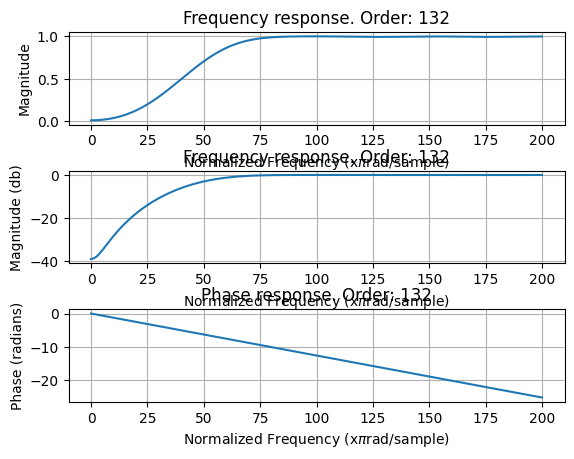

In [25]:
mfreqz(ca,1,132,200)

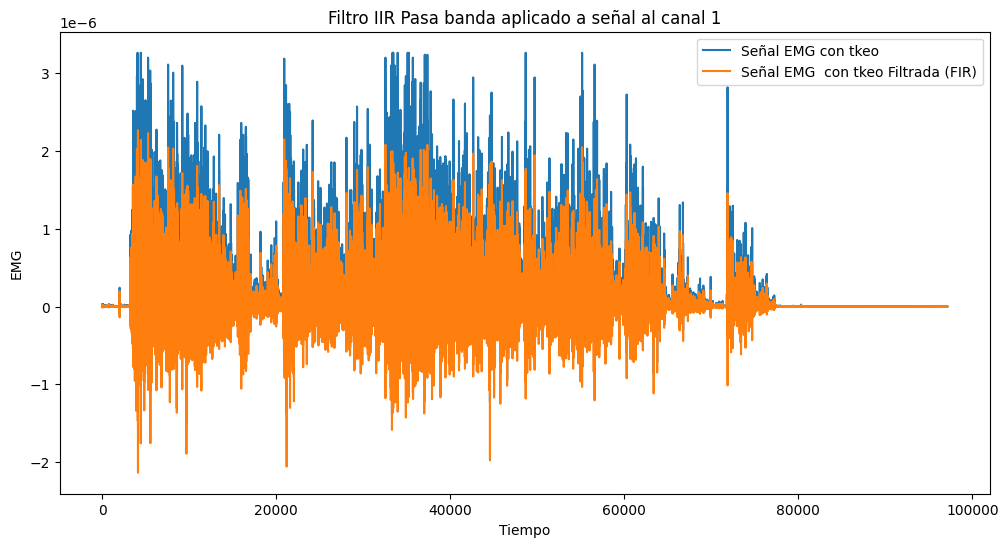

In [26]:
# Graficar la señal original y la señal filtrada por el filtro FIR
plt.figure(figsize=(12, 6))
plt.plot(all_data['tiempo'], tkeo_canal, label='Señal EMG con tkeo')
plt.plot(all_data['tiempo'], filtrada1, label='Señal EMG  con tkeo Filtrada (FIR)')
plt.title('Filtro IIR Pasa banda aplicado a señal al canal 1')
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.legend()
plt.show()

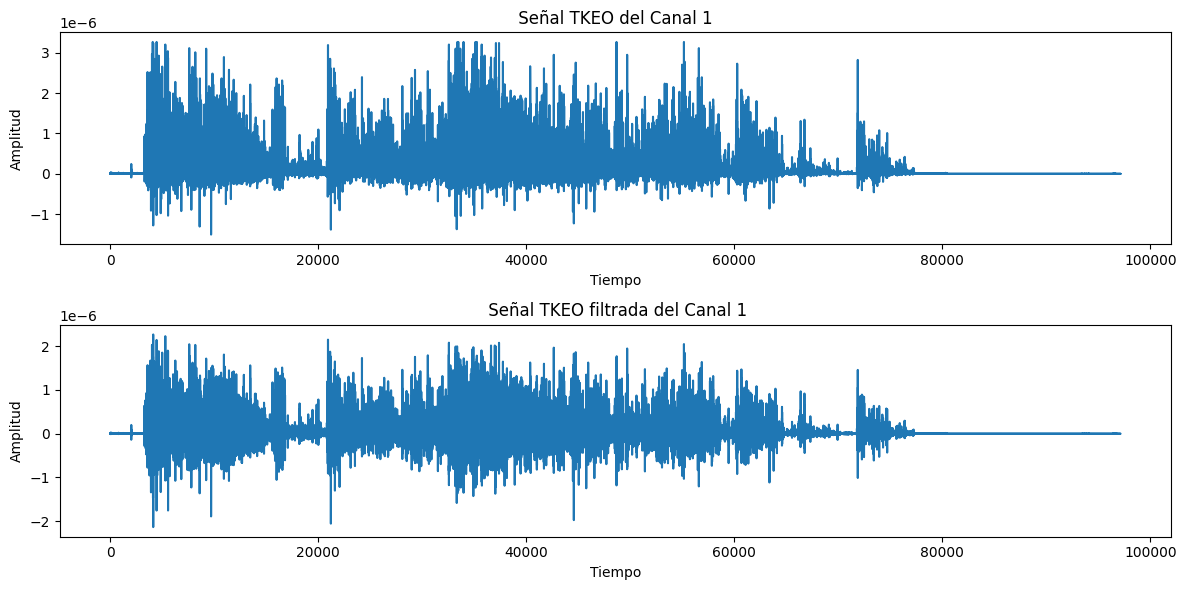

In [27]:
# Grafico la señal con tkeo, y la señal filtrada
# Visualizar el resultado
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(all_data['tiempo'], tkeo_canal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title(' Señal TKEO del Canal 1 ')

plt.subplot(212)
plt.plot(all_data['tiempo'], filtrada1)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title(' Señal TKEO filtrada del Canal 1')

plt.tight_layout()
plt.show()


**_Filtro IIR_**

In [28]:
def filtro_IIR(senal_sin):
    """
    Función para aplicar un filtro IIR pasa-banda a una señal.
    """
    fs_IR = 100  # Frecuencia de muestreo
    fn_IR = fs_IR / 2  # Frecuencia de Nyquist
    wna_IR = 10/ fn_IR  # Frecuencia normalizada para bajas

    
    #ss_IR = 1650+1   # Orden del filtro pasa-altas
    #sc_IR = 33  # Orden del filtro pasa-bajas

    # Diseño del filtro IIR pasa-altas
    bhpf, ahpf = signal.butter(17, wna_IR, btype='high', analog=False)





    # Filtrado de la señal
    senal_filtrada_1 = signal.filtfilt(bhpf, ahpf,senal_sin )  # Aplicar filtro pasa-altas

    return senal_filtrada_1, bhpf, ahpf
   

In [29]:
filtrada2, bhpf, ahpf, = filtro_IIR(tkeo_canal)

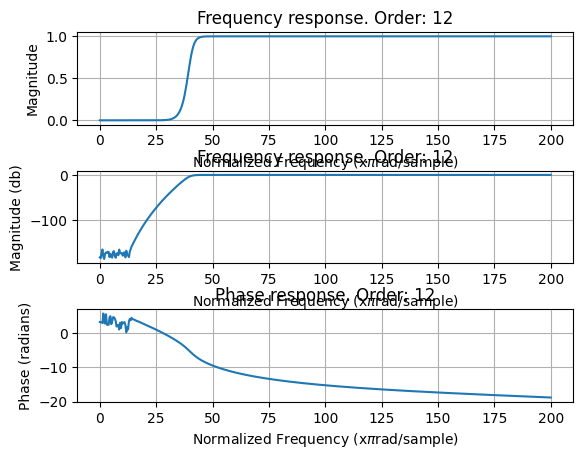

In [30]:
mfreqz(bhpf, ahpf,12,200)

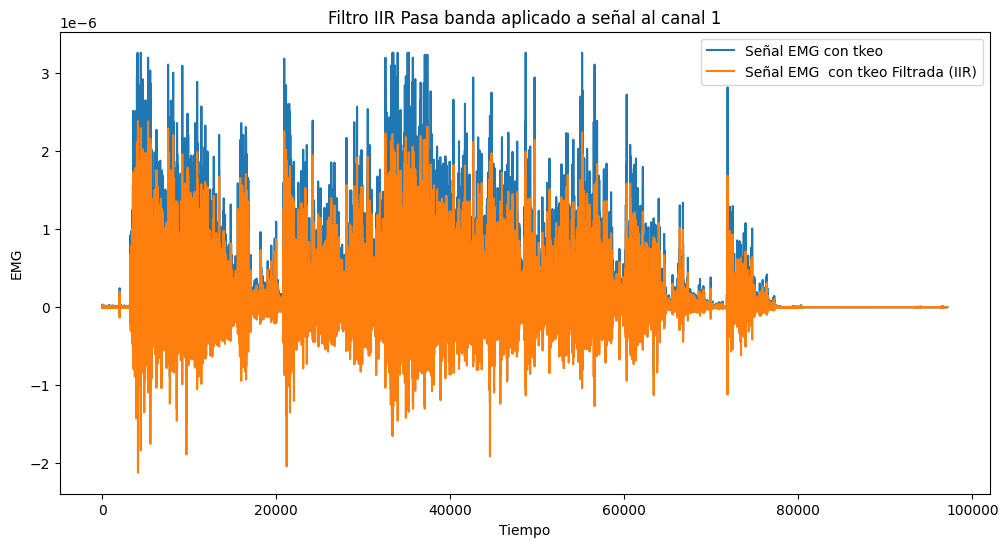

In [31]:

# Graficar la señal original y la señal filtrada por el filtro IIR
plt.figure(figsize=(12, 6))
plt.plot(all_data['tiempo'], tkeo_canal, label='Señal EMG con tkeo')
plt.plot(all_data['tiempo'], filtrada2, label='Señal EMG  con tkeo Filtrada (IIR)')
plt.title('Filtro IIR Pasa banda aplicado a señal al canal 1')
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.legend()
plt.show()


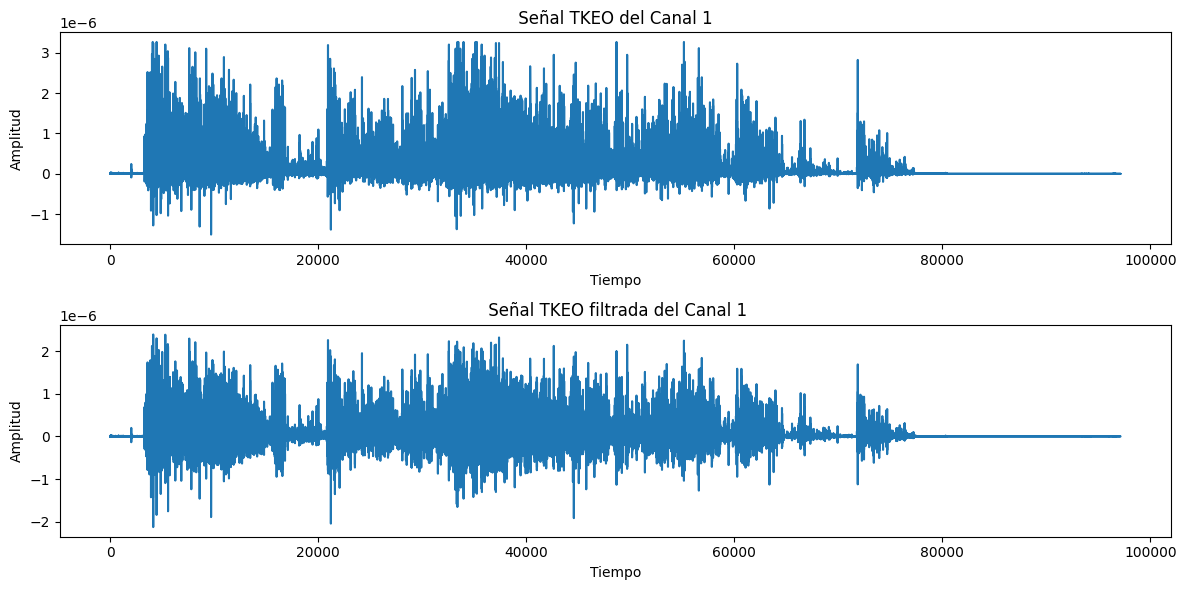

In [32]:
# Grafico la señal con tkeo, y la señal filtrada
# Visualizar el resultado
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(all_data['tiempo'], tkeo_canal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title(' Señal TKEO del Canal 1 ')

plt.subplot(212)
plt.plot(all_data['tiempo'], filtrada2)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title(' Señal TKEO filtrada del Canal 1')

plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# Señal original
emg_original = tkeo_canal

# Señales filtradas
emg_fir = filtrada1
emg_iir = filtrada2

# Calcular Error Cuadrático Medio (MSE) y Coeficiente de Correlación
mse_fir = mean_squared_error(emg_original, emg_fir)
mse_iir = mean_squared_error(emg_original, emg_iir)

corr_fir, _ = pearsonr(emg_original, emg_fir)
corr_iir, _ = pearsonr(emg_original, emg_iir)

print("Filtro FIR:")
print(f"Error Cuadrático Medio (MSE): {mse_fir}")
print(f"Coeficiente de Correlación: {corr_fir}\n")

print("Filtro IIR:")
print(f"Error Cuadrático Medio (MSE): {mse_iir}")
print(f"Coeficiente de Correlación: {corr_iir}")

Filtro FIR:
Error Cuadrático Medio (MSE): 1.2693397669480674e-15
Coeficiente de Correlación: 0.8160289114653608

Filtro IIR:
Error Cuadrático Medio (MSE): 1.2228328515356793e-15
Coeficiente de Correlación: 0.8201535605017162


Teniendo en cuenta los resultados anteriores, se opta por trabajar con el filtro FIR,Dado a que tiene menor error cuadrático y mayor correlación. Además, el análisis anterior se realizó para un solo canal, y cuando se trabaja con varios canales al mismo tiempo, es necesario considerar que los filtros IIR pueden distorsionar la fase, lo que puede llevar a errores. Los autores Oppenheim y Schafer explican que los filtros IIR pueden introducir distorsión de fase no lineal, lo que puede ser problemático cuando se trabaja con múltiples canales simultáneamente. Esto se debe a que la distorsión de fase puede variar para cada canal, lo que puede llevar a errores en la alineación de fase y, en consecuencia, a errores en el procesamiento posterior de las señales de múltiples canales.

**c. (10%) Obtener los índices del proyecto 1 usando la señal filtrada (Después de aplicar señal TKEO). Comparar los índices obtenidos de la señal filtrada con los obtenidos en el proyecto 1 (Señal con Operador TKEO) usando gráficos de Análisis Exploratorio de Datos**

**_Aplicación de la función del filtro fir a todos los datos_**

In [34]:
def apply_filtro(df):
    """
    Función para aplicar el filtro FIR a todas las columnas de un DataFrame.
    """
    filtered_df = df.copy()  # Crear una copia del DataFrame original
    
    # Iterar sobre todas las columnas excepto la primera (índice) y la última (tiempo)
    for col in filtered_df.columns[2:-2]:
        
        # Crear una serie temporal a partir de la columna actual
        serie_temp = pd.Series(filtered_df[col].values, index=filtered_df['tiempo'])
        
        # Aplicar el filtro FIR a la serie temporal
        serie_filtrada, _ = filtro_FIR(serie_temp.values)
        
        # Asignar la serie filtrada a la columna correspondiente del DataFrame
        filtered_df[col] = serie_filtrada
        
    return filtered_df

In [35]:
df_filtro = apply_filtro(df_tkeo) # Datos aplicando el operador

In [36]:
df_filtro

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-7.663337e-14,-8.940559e-14,-1.149500e-13,7.673242e-30,2.709713e-27,2.821714e-28,8.105515e-28,0.0,1
1,5,0.00001,8.051236e-10,5.433421e-10,1.278764e-09,-1.579143e-11,-1.206076e-10,-1.574150e-11,1.466800e-10,0.0,1
2,6,-0.00001,2.301998e-10,5.169249e-10,9.009786e-12,7.429574e-11,1.653175e-10,7.476993e-11,1.176270e-10,0.0,1
3,7,-0.00001,-1.808910e-10,-2.194678e-10,-1.635871e-10,-2.570837e-11,-3.372933e-11,-2.410400e-11,-7.806453e-11,0.0,1
4,8,-0.00001,-1.579136e-10,-2.045483e-10,-1.662193e-10,-1.989503e-11,-2.418620e-11,-1.639787e-11,-5.159663e-11,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,7.419799e-11,5.363655e-10,-9.966892e-10,1.029734e-10,9.577956e-12,-7.193856e-12,0.000000e+00,0.0,36
2195967,54833,-0.00004,-3.974042e-11,2.009750e-10,-1.634246e-09,6.109799e-11,3.588838e-12,-2.520960e-11,0.000000e+00,0.0,36
2195968,54834,-0.00004,-3.129895e-10,-9.407719e-10,-1.664996e-09,-1.196635e-10,-1.679950e-11,-4.833152e-11,0.000000e+00,0.0,36
2195969,54835,-0.00004,-1.536742e-10,-2.965415e-09,1.029927e-08,-6.548265e-10,-5.295385e-11,1.252881e-10,0.000000e+00,0.0,36


In [37]:
# Aplico las métricas a la señal filtrada 
#Ordenar Dataframe Tkeo
df_ordenado_filtro= df_filtro.sort_values(by='clase')

# Diccionario para almacenar los resultados
resultados_filtro = []

# Iterar sobre los grupos definidos por los valores de la columna 'clase'
for clase, grupo in df_ordenado_filtro.groupby('clase'):
    # Iterar sobre las columnas de interés (de la 2 a la 9)
    for columna in df_filtro.columns[1:9]:
        canal = grupo[columna]
        
        # Aplicar las características a cada canal
        caracteristicas = {
            'sujeto': grupo['sujeto'].iloc[0],  # Tomamos el valor del sujeto del primer elemento del grupo
            'clase': clase,
            'canal': columna,
            'rms': rms(canal),
            'variance': variance(canal),
            'mean_absolute_value': mean_absolute_value(canal),
            'mean_absolute_value_slope': mean_absolute_value_slope(canal),
            'slope_sign_changes': slope_sign_changes(canal),
            'wave_form_length': wave_form_length(canal),
            'zero_crossings': zero_crossings(canal)
        }
        
        # Añadir los resultados a la lista
        resultados_filtro.append(caracteristicas)

# Convertir la lista de diccionarios en un DataFrame
df_resultados_filtro = pd.DataFrame(resultados_filtro)

# El DataFrame df_resultados ahora contiene los resultados de las características para cada grupo de la columna 'clase', cada canal y sujeto.
df_resultados_filtro  # Muestra las primeras filas del DataFrame de resultados

,sujeto,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings
0,1,0.0,canal_1,1.466615e-04,2.145317e-08,6.563766e-05,4.797408e-24,460388,32.819960,192333
1,1,0.0,canal_2,3.026137e-08,9.157506e-16,3.433882e-09,5.141307e-17,642407,0.007281,514580
2,1,0.0,canal_3,2.958201e-08,8.750952e-16,3.978677e-09,1.575649e-19,641051,0.008442,514129
3,1,0.0,canal_4,5.881564e-08,3.459280e-15,1.075110e-08,1.010704e-17,642196,0.022879,515344
4,1,0.0,canal_5,7.109559e-08,5.054583e-15,1.524215e-08,8.333696e-21,643864,0.032463,516114
...,...,...,...,...,...,...,...,...,...,...
59,30,7.0,canal_4,1.488965e-08,2.217017e-16,4.862498e-09,1.948837e-12,3471,0.000051,2632
60,30,7.0,canal_5,8.777868e-08,7.705097e-15,3.308067e-08,3.791336e-12,3481,0.000360,2688
61,30,7.0,canal_6,8.191125e-08,6.709453e-15,2.715142e-08,5.520179e-14,3492,0.000300,2751
62,30,7.0,canal_7,5.271608e-09,2.778985e-17,1.822947e-09,-2.955247e-15,3476,0.000020,2683


In [38]:
df_resultados_filtro['canal'] = df_resultados_filtro['canal'].str.extract('(\d+)').astype(int)

print(df_resultados_filtro)

    sujeto  clase  canal           rms      variance  mean_absolute_value  \
0        1    0.0      1  1.466615e-04  2.145317e-08         6.563766e-05   
1        1    0.0      2  3.026137e-08  9.157506e-16         3.433882e-09   
2        1    0.0      3  2.958201e-08  8.750952e-16         3.978677e-09   
3        1    0.0      4  5.881564e-08  3.459280e-15         1.075110e-08   
4        1    0.0      5  7.109559e-08  5.054583e-15         1.524215e-08   
..     ...    ...    ...           ...           ...                  ...   
59      30    7.0      4  1.488965e-08  2.217017e-16         4.862498e-09   
60      30    7.0      5  8.777868e-08  7.705097e-15         3.308067e-08   
61      30    7.0      6  8.191125e-08  6.709453e-15         2.715142e-08   
62      30    7.0      7  5.271608e-09  2.778985e-17         1.822947e-09   
63      30    7.0      8  6.327160e-08  4.003295e-15         2.002720e-08   

    mean_absolute_value_slope  slope_sign_changes  wave_form_length  \
0   

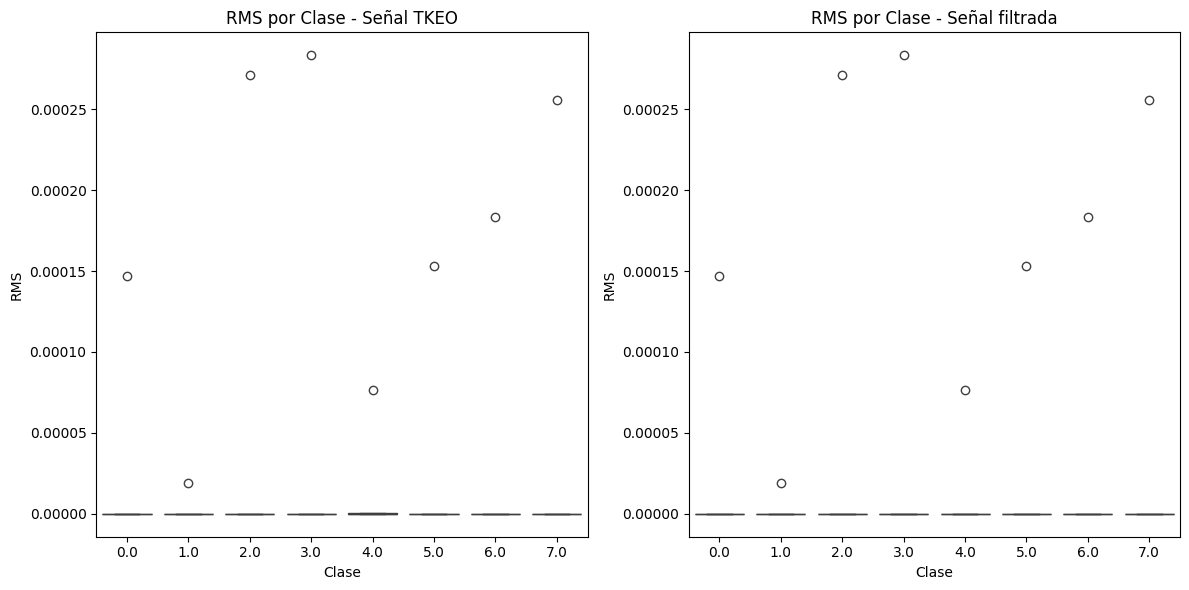

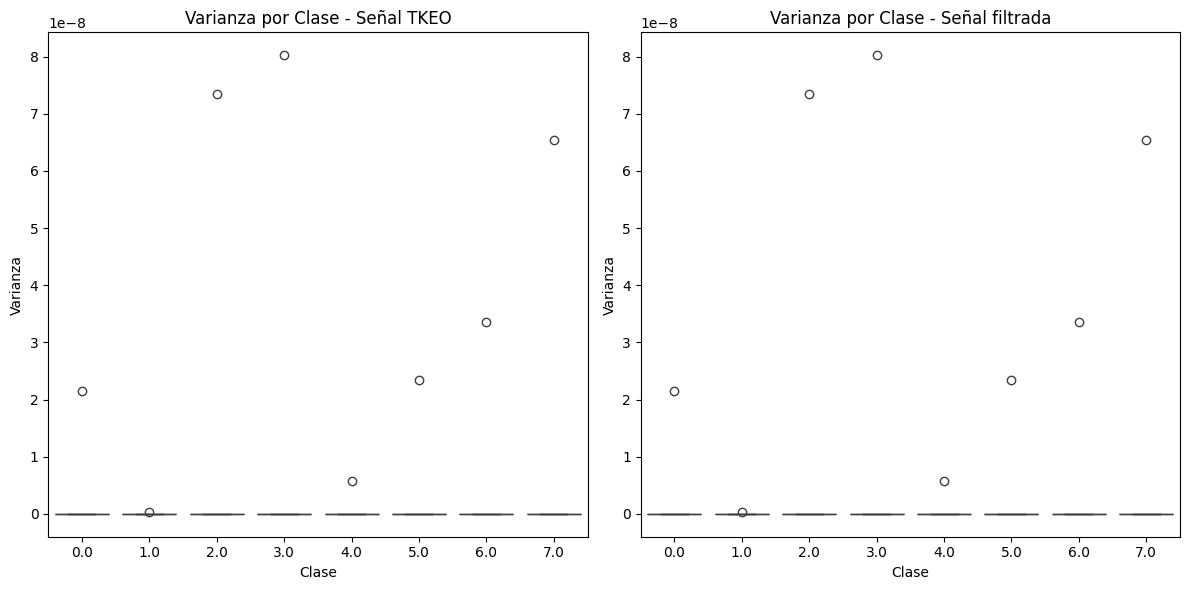

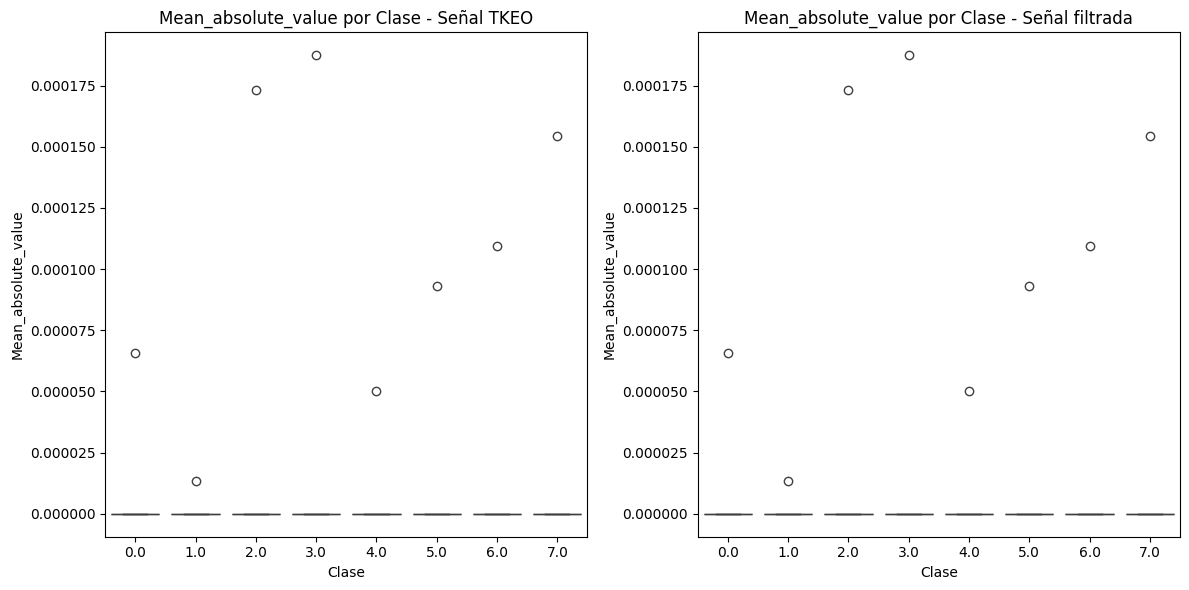

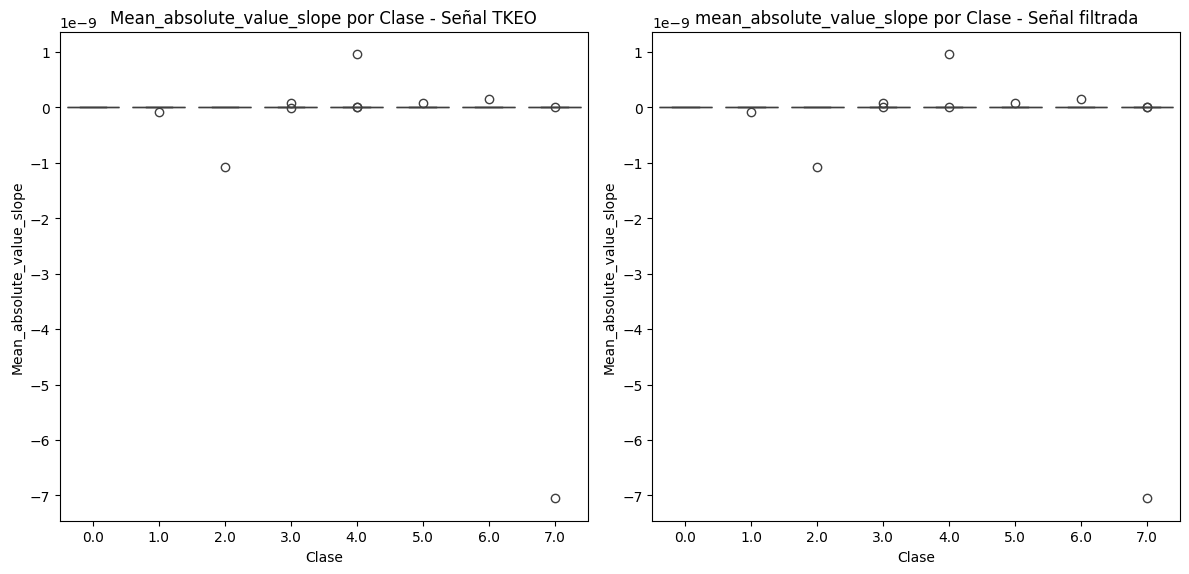

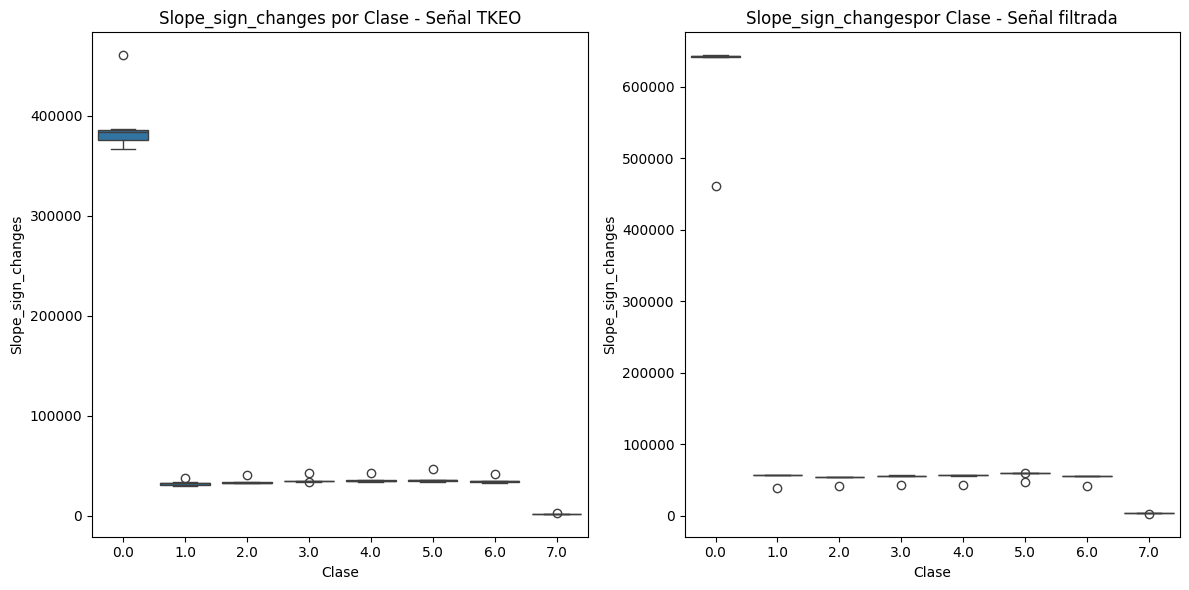

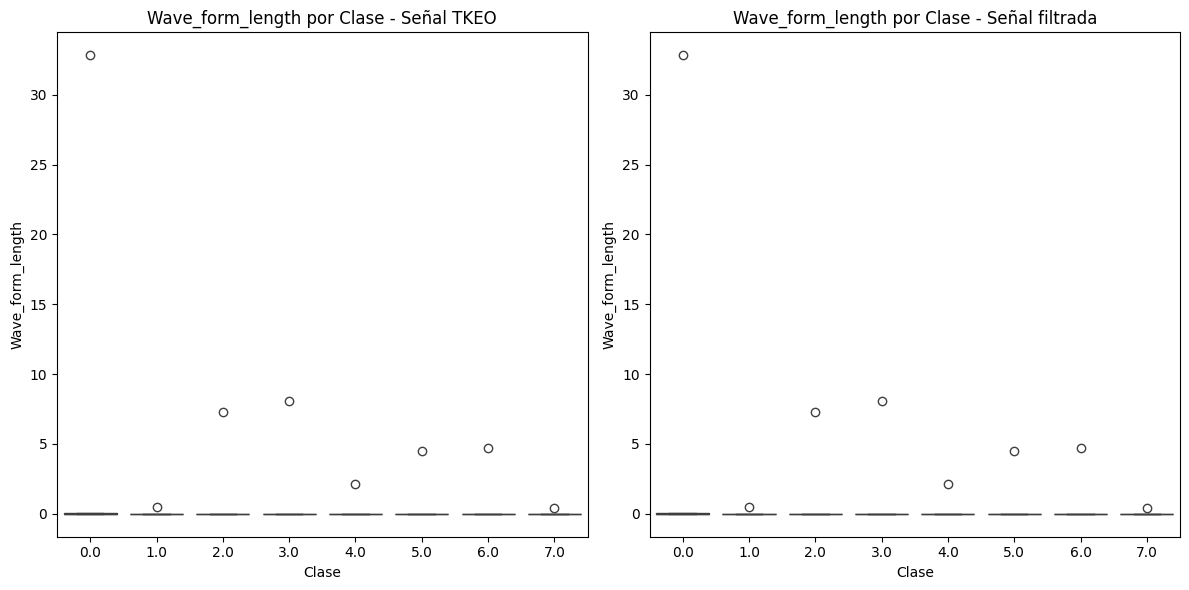

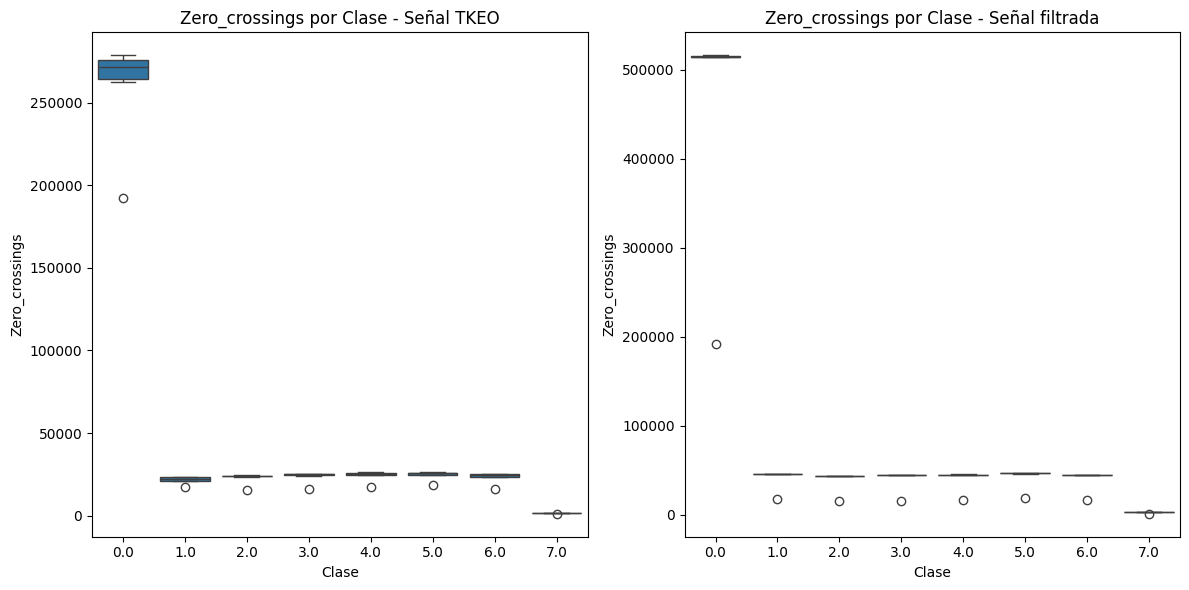

In [39]:
# Filtrar los datos para tener solo las métricas RMS y Varianza
metricas_tkeo = df_resultados_tkeo[['clase', 'rms', 'variance','mean_absolute_value','mean_absolute_value_slope','slope_sign_changes','wave_form_length','zero_crossings']]
metricas_filtro = df_resultados_filtro[['clase', 'rms', 'variance','mean_absolute_value','mean_absolute_value_slope','slope_sign_changes','wave_form_length','zero_crossings']]

# Crear diagramas de caja y bigotes para las métricas RMS y Varianza
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='rms', data=metricas_tkeo )
plt.title('RMS por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('RMS')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='rms', data=metricas_filtro)
plt.title('RMS por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('RMS')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='variance', data=metricas_tkeo)
plt.title('Varianza por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Varianza')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='variance', data=metricas_filtro)
plt.title('Varianza por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Varianza')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='mean_absolute_value', data=metricas_tkeo)
plt.title('Mean_absolute_value por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='mean_absolute_value', data=metricas_filtro)
plt.title('Mean_absolute_value por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='mean_absolute_value_slope', data=metricas_tkeo)
plt.title('Mean_absolute_value_slope por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value_slope')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='mean_absolute_value_slope', data=metricas_filtro)
plt.title('mean_absolute_value_slope por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value_slope')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='slope_sign_changes', data=metricas_tkeo)
plt.title('Slope_sign_changes por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Slope_sign_changes')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='slope_sign_changes', data=metricas_filtro)
plt.title('Slope_sign_changespor Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Slope_sign_changes')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='wave_form_length', data=metricas_tkeo)
plt.title('Wave_form_length por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Wave_form_length')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='wave_form_length', data=metricas_filtro)
plt.title('Wave_form_length por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Wave_form_length')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='zero_crossings', data=metricas_tkeo)
plt.title('Zero_crossings por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Zero_crossings')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='zero_crossings', data=metricas_filtro)
plt.title('Zero_crossings por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Zero_crossings')

plt.tight_layout()
plt.show()






Como tenémos algunos datos atípicos (valores diferentes a las otras observaciones del mismo grupo de datos), entonces se opta por eliminar estos datos para poder apreciar mejor el comportamiento del grupo de datos, mediante el IQR, una técnica sólida, muy utilizada para identificar valores atípicos.El IQR (rango intercuartílico) es la distancia entre el primer y el tercer cuartil, que representan los límites de la caja en un diagrama de caja y bigotes. John Tukey propuso que cualquier dato que se encuentre a más de 1,5 veces el IQR por debajo del primer cuartil o por encima del tercer cuartil debe considerarse un valor atípico o extremo. En un diagrama de caja y bigotes, los bigotes se extienden hasta el último dato que no se considere un valor atípico [11].

In [40]:
#Para eliminar datos atípicos 
def filtrar_outliers(df, cols, factor=1.5):
    """
    Función para filtrar valores atípicos en columnas específicas de un DataFrame.

    Argumentos que recibo:
    df: DataFrame de pandas con los datos.
    cols: Lista de columnas a filtrar.
    factor: Factor para definir el rango de valores válidos (por defecto 1.5).

    Retorna:
    DataFrame con los valores atípicos reemplazados por NaN.
    """
    for col in cols:
        q1 = df[col].quantile(0.25)  # Cuartil inferior
        q3 = df[col].quantile(0.75)  # Cuartil superior
        iqr = q3 - q1  # Rango intercuartil
        rango_valido = [q1 - factor * iqr, q3 + factor * iqr]  # Rango de valores válidos
        df.loc[~df[col].between(rango_valido[0], rango_valido[1]), col] = np.nan  # Reemplazar outliers por NaN
    return df

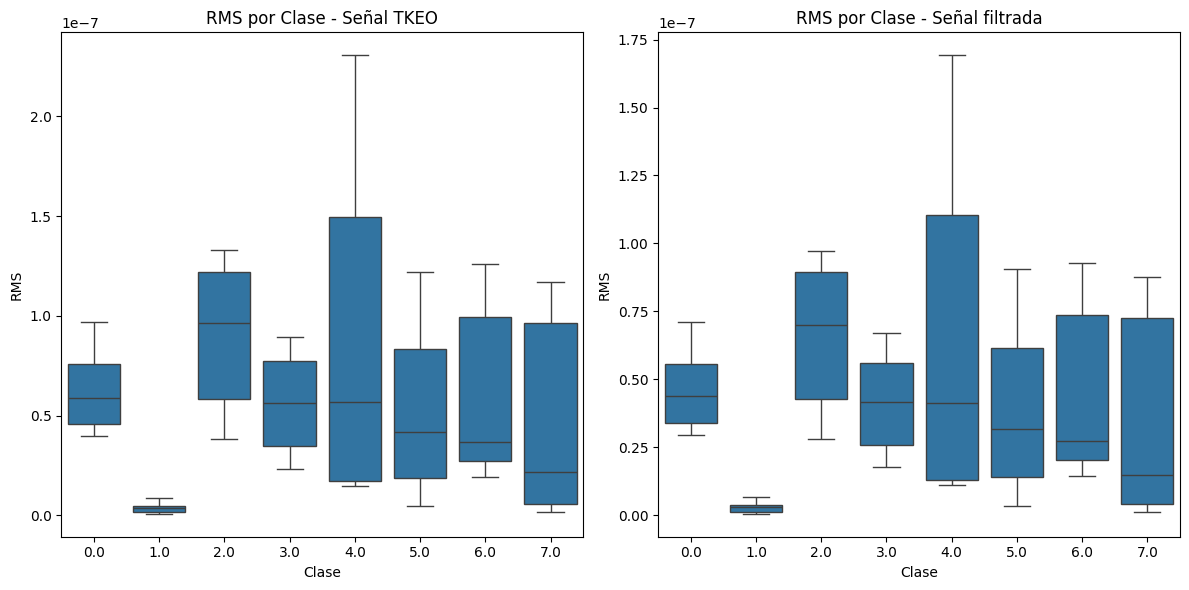

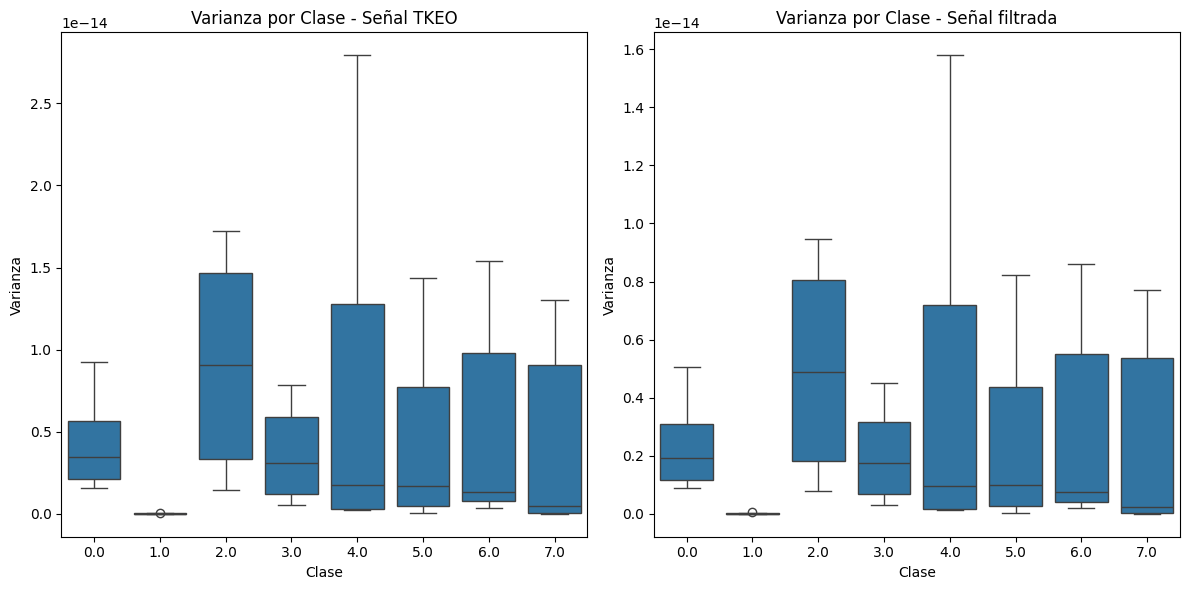

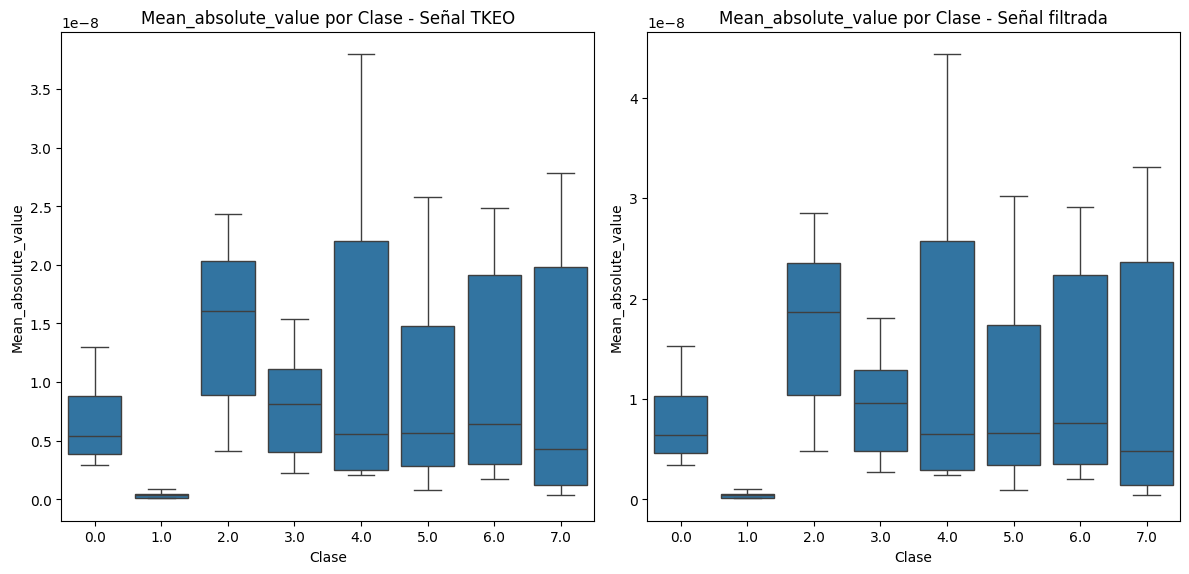

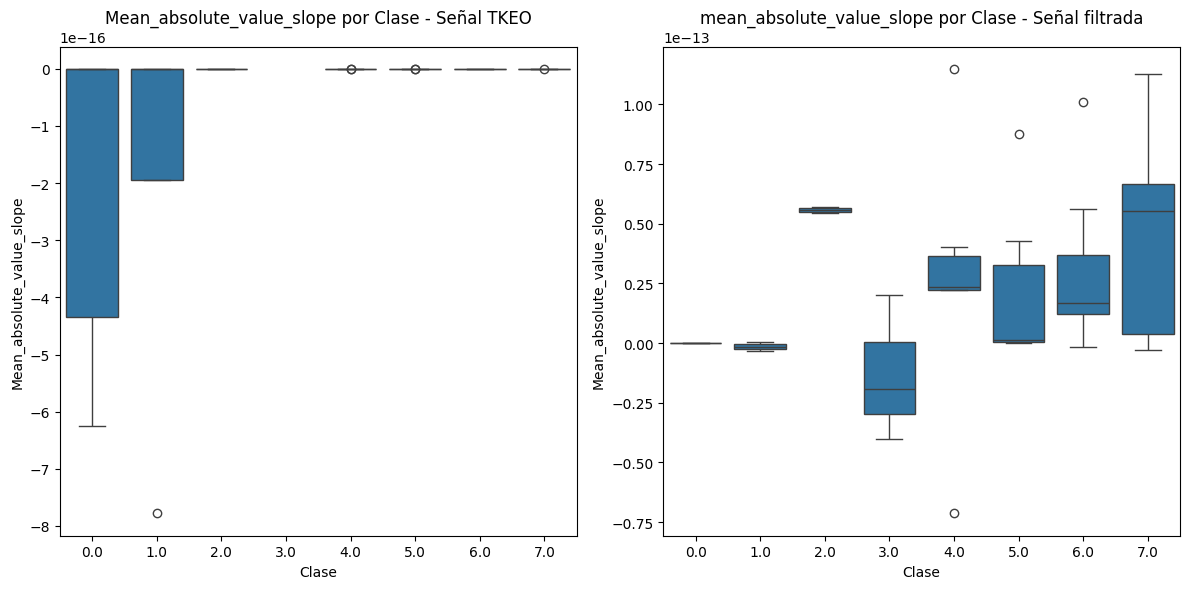

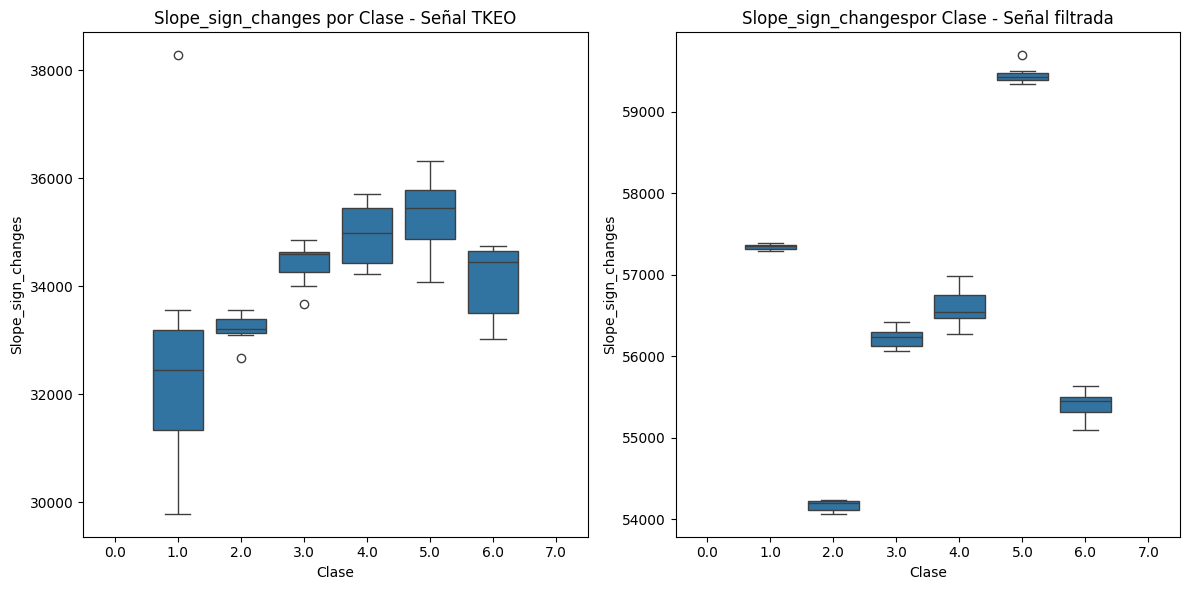

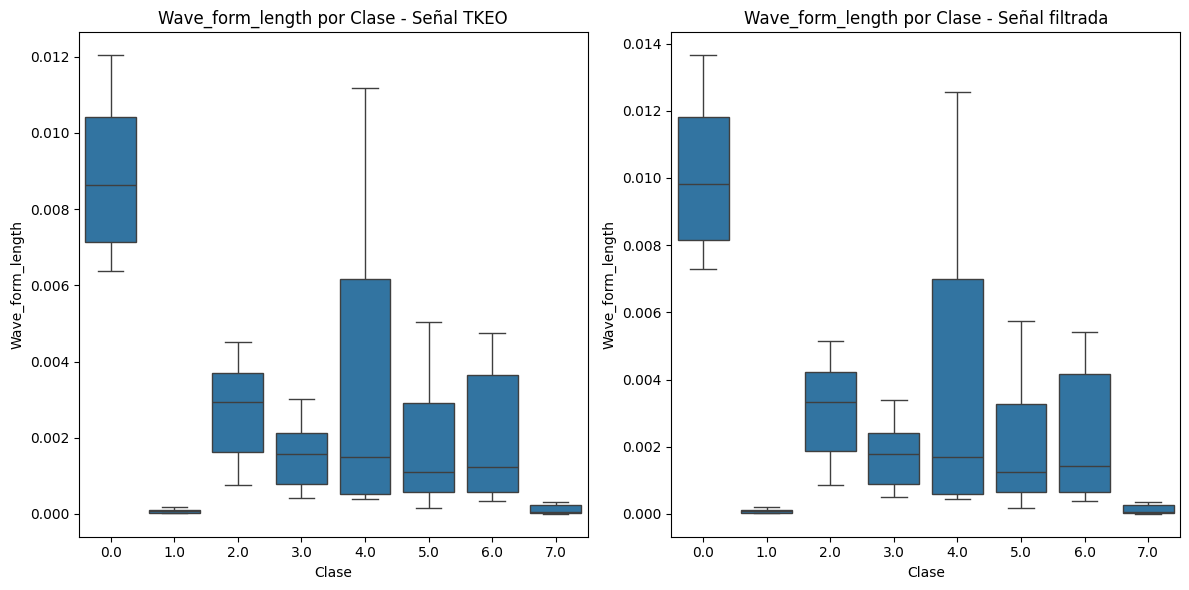

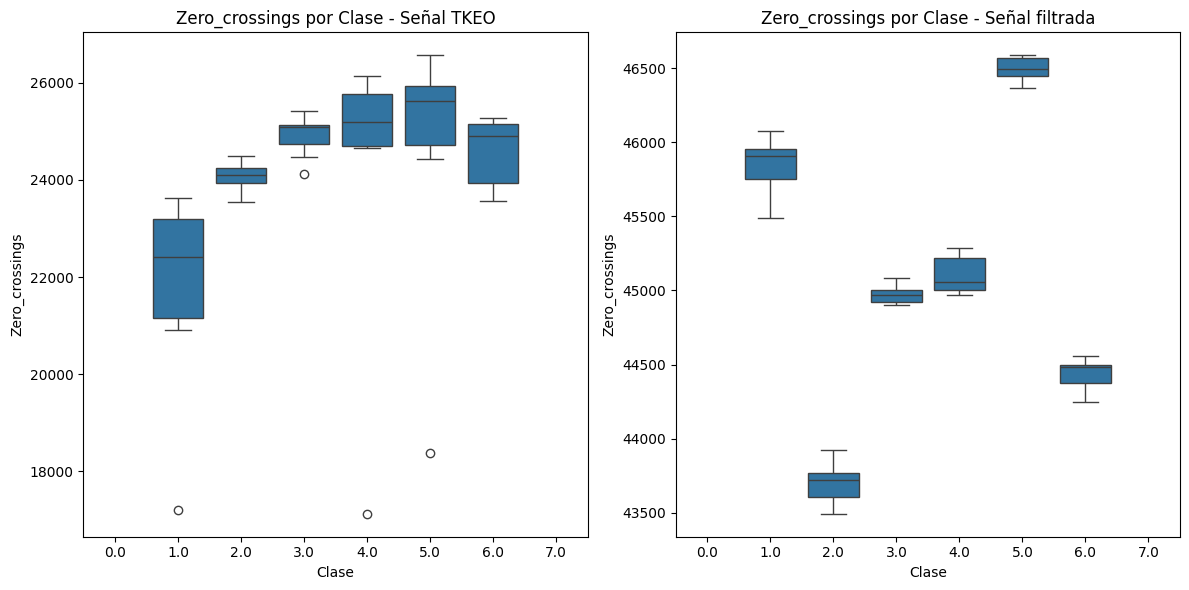

In [41]:
cols_filtrar = ['rms', 'variance', 'mean_absolute_value', 'mean_absolute_value_slope', 'slope_sign_changes', 'wave_form_length', 'zero_crossings']

metricas_tkeo = filtrar_outliers(metricas_tkeo, cols_filtrar)
metricas_filtro = filtrar_outliers(metricas_filtro, cols_filtrar)

# Crear diagramas de caja y bigotes para las métricas RMS y Varianza
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='rms', data=metricas_tkeo )
plt.title('RMS por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('RMS')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='rms', data=metricas_filtro)
plt.title('RMS por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('RMS')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='variance', data=metricas_tkeo)
plt.title('Varianza por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Varianza')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='variance', data=metricas_filtro)
plt.title('Varianza por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Varianza')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='mean_absolute_value', data=metricas_tkeo)
plt.title('Mean_absolute_value por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='mean_absolute_value', data=metricas_filtro)
plt.title('Mean_absolute_value por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='mean_absolute_value_slope', data=metricas_tkeo)
plt.title('Mean_absolute_value_slope por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value_slope')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='mean_absolute_value_slope', data=metricas_filtro)
plt.title('mean_absolute_value_slope por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Mean_absolute_value_slope')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='slope_sign_changes', data=metricas_tkeo)
plt.title('Slope_sign_changes por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Slope_sign_changes')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='slope_sign_changes', data=metricas_filtro)
plt.title('Slope_sign_changespor Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Slope_sign_changes')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='wave_form_length', data=metricas_tkeo)
plt.title('Wave_form_length por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Wave_form_length')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='wave_form_length', data=metricas_filtro)
plt.title('Wave_form_length por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Wave_form_length')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='clase', y='zero_crossings', data=metricas_tkeo)
plt.title('Zero_crossings por Clase - Señal TKEO')
plt.xlabel('Clase')
plt.ylabel('Zero_crossings')

plt.subplot(1, 2, 2)
sns.boxplot(x='clase', y='zero_crossings', data=metricas_filtro)
plt.title('Zero_crossings por Clase - Señal filtrada')
plt.xlabel('Clase')
plt.ylabel('Zero_crossings')

plt.tight_layout()
plt.show()


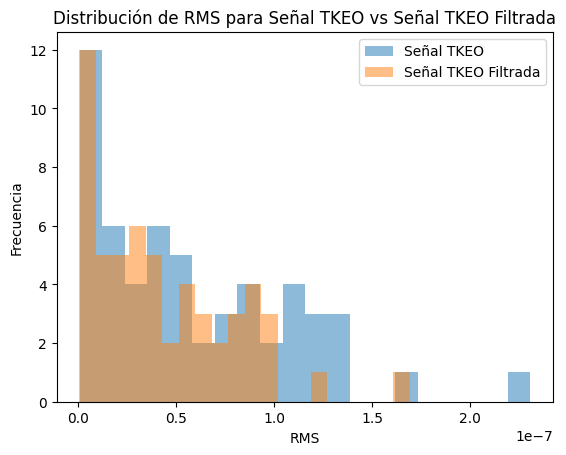

In [42]:
# Histograma de RMS para la señal original y la señal TKEO
plt.hist(metricas_tkeo['rms'], bins=20, alpha=0.5, label='Señal TKEO')
plt.hist(metricas_filtro['rms'], bins=20, alpha=0.5, label='Señal TKEO Filtrada')
plt.xlabel('RMS')
plt.ylabel('Frecuencia')
plt.title('Distribución de RMS para Señal TKEO vs Señal TKEO Filtrada')
plt.legend()
plt.show()

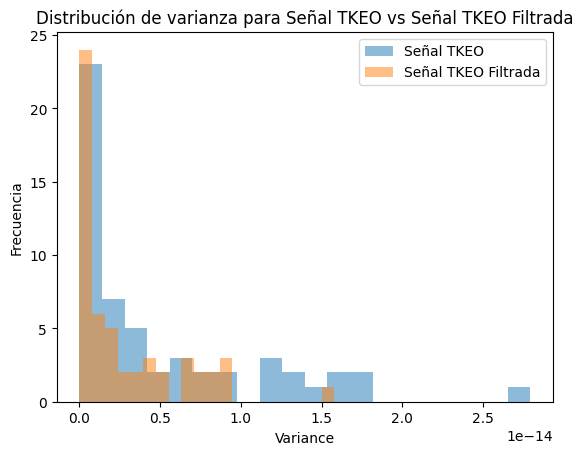

In [43]:
# Histograma de variance para la señal original y la señal TKEO
plt.hist(metricas_tkeo['variance'], bins=20, alpha=0.5, label='Señal TKEO')
plt.hist(metricas_filtro['variance'], bins=20, alpha=0.5, label='Señal TKEO Filtrada')
plt.xlabel('Variance')
plt.ylabel('Frecuencia')
plt.title('Distribución de varianza para Señal TKEO vs Señal TKEO Filtrada')
plt.legend()
plt.show()

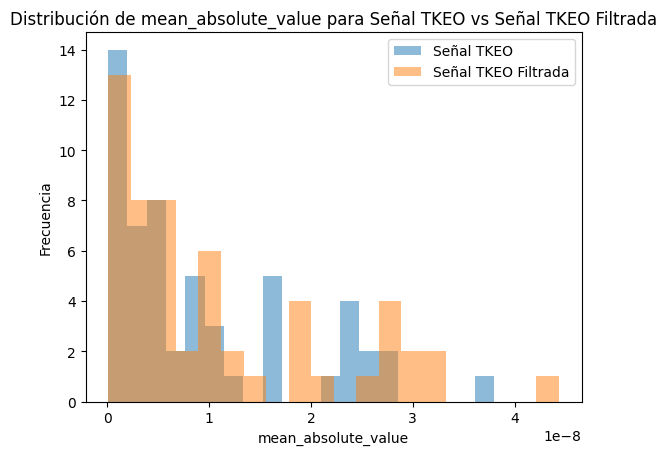

In [44]:
# Histograma de mean_absolute_value' para la señal original y la señal TKEO
plt.hist(metricas_tkeo['mean_absolute_value'], bins=20, alpha=0.5, label='Señal TKEO')
plt.hist(metricas_filtro['mean_absolute_value'], bins=20, alpha=0.5, label='Señal TKEO Filtrada')
plt.xlabel('mean_absolute_value')
plt.ylabel('Frecuencia')
plt.title('Distribución de mean_absolute_value para Señal TKEO vs Señal TKEO Filtrada')
plt.legend()
plt.show()

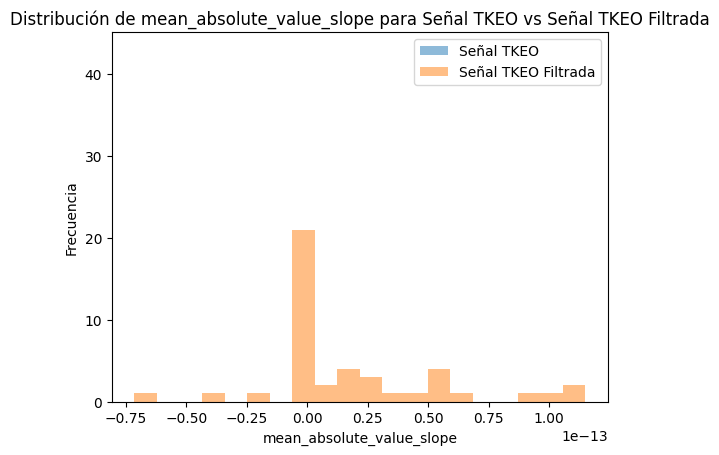

In [45]:
# Histograma de mean_absolute_value' para la señal original y la señal TKEO
plt.hist(metricas_tkeo['mean_absolute_value_slope'], bins=20, alpha=0.5, label='Señal TKEO')
plt.hist(metricas_filtro['mean_absolute_value_slope'], bins=20, alpha=0.5, label='Señal TKEO Filtrada')
plt.xlabel('mean_absolute_value_slope')
plt.ylabel('Frecuencia')
plt.title('Distribución de mean_absolute_value_slope para Señal TKEO vs Señal TKEO Filtrada')
plt.legend()
plt.show()

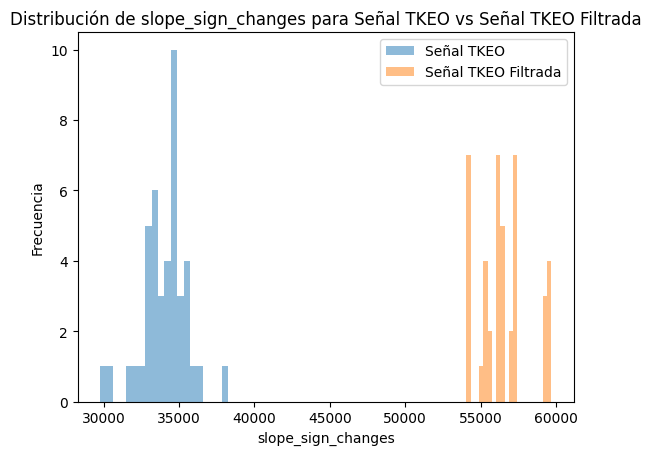

In [46]:
# Histograma de mean_absolute_value' para la señal original y la señal TKEO
plt.hist(metricas_tkeo['slope_sign_changes'], bins=20, alpha=0.5, label='Señal TKEO')
plt.hist(metricas_filtro['slope_sign_changes'], bins=20, alpha=0.5, label='Señal TKEO Filtrada')
plt.xlabel('slope_sign_changes')
plt.ylabel('Frecuencia')
plt.title('Distribución de slope_sign_changes para Señal TKEO vs Señal TKEO Filtrada')
plt.legend()
plt.show()


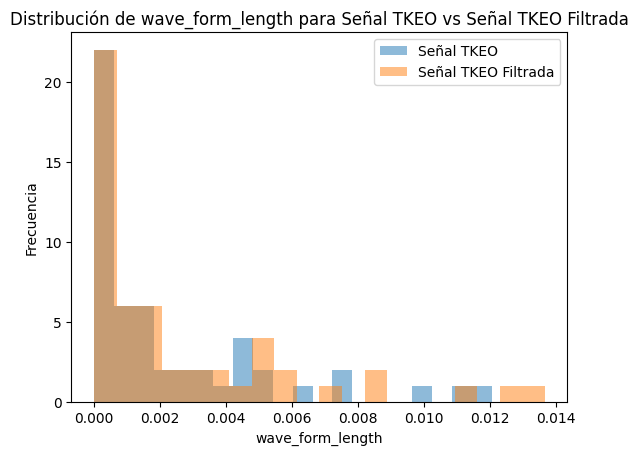

In [47]:
# Histograma de mean_absolute_value' para la señal original y la señal TKEO
plt.hist(metricas_tkeo['wave_form_length'], bins=20, alpha=0.5, label='Señal TKEO')
plt.hist(metricas_filtro['wave_form_length'], bins=20, alpha=0.5, label='Señal TKEO Filtrada')
plt.xlabel('wave_form_length')
plt.ylabel('Frecuencia')
plt.title('Distribución de wave_form_length para Señal TKEO vs Señal TKEO Filtrada')
plt.legend()
plt.show()

A partir del análisis de los diagramas de cajas y bigotes, se puede observar que tanto para la señal TKEO como para la señal filtrada, se evidencian diferencias notables en los datos correspondientes a los movimientos en todas las métricas empleadas. 

Basandonos en la presmisa anterior vamos a hacer comparaciones entre movimiento, a partir de la implementación de pruebas paramétricas o no paramétricas, dependiendo de la distribución de los datos. 

Es menester mencionar que estás pruebas se realizan para todas las métricas y todos los movimientos.

Análisis para las métricas sin tkeo

Comprobación de supuestos

- Independencia

- Normalidad

- Homocedasticidad

**Independencia:**

Se asumen todos movimientos independientes entre si, dado que se tomaron en momentos diferentes, y el uno no depende del otro.

**Normalidad**

Para evaluar este supuesto se parte de las siguientes hipótesis H0 = La distribución de los datos es normal.

H1 = La distribución de los datos no es normal.

Se calcula el valor p;

se define un α = 0.05

Por tanto si p es mayor a α, entonces se puede asumir con un 95% de certeza que los datos están distribuidos de manera normal.

In [48]:
#para la señal TKEO
group = df_resultados_tkeo.groupby('clase')

clases = []
for clase, data_frame in group:
    clases.append(data_frame.values)
clase0 = group.get_group(0)
clase1 = group.get_group(1)
clase2 = group.get_group(2)
clase3 = group.get_group(3)
clase4 = group.get_group(4)
clase5 = group.get_group(5)
clase6 = group.get_group(6)
clase7 = group.get_group(7) 

In [49]:
#para la señal TKEO filtrada
group_f = df_resultados_filtro.groupby('clase')

clase_ = []
for clase, data_frame in group:
    clase_.append(data_frame.values)
clase0_f = group_f.get_group(0)
clase1_f = group_f.get_group(1)
clase2_f = group_f.get_group(2)
clase3_f = group_f.get_group(3)
clase4_f = group_f.get_group(4)
clase5_f = group_f.get_group(5)
clase6_f = group_f.get_group(6)
clase7_f = group_f.get_group(7)

Evaluación de normalidad para los datos RMS, Varianza  y el mean_absolute_value de los movimientos 0 y 1 de la señal TKEO

In [50]:
# Distribución de RMS con TKEO clase 0
rms_t= clase0.iloc[:,3]
shapiro_test = stats.shapiro(rms_t)
print("Prueba de Shapiro-Wilk para RMS:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para RMS:
Estadística de prueba: 0.4187515516137186
Valor p: 1.0577788641674722e-06
No normal


In [51]:
# Distribución de RMS con TKEO clase 1
rms_t1= clase1.iloc[:,3]
shapiro_test = stats.shapiro(rms_t1)
print("Prueba de Shapiro-Wilk para RMS:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para RMS:
Estadística de prueba: 0.4187419272509775
Valor p: 1.057489986851056e-06
No normal


In [52]:
# Distribución de variance con TKEO clase 0
variance_t= clase0.iloc[:,4]
shapiro_test = stats.shapiro(variance_t)
print("Prueba de Shapiro-Wilk para Var:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para Var:
Estadística de prueba: 0.4183987555515659
Valor p: 1.0472404911719334e-06
No normal


In [53]:
# Distribución de variance con TKEO clase 1
variance_t1= clase1.iloc[:,4]
shapiro_test = stats.shapiro(variance_t1)
print("Prueba de Shapiro-Wilk para Var:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para Var:
Estadística de prueba: 0.4183986324723671
Valor p: 1.047236832867936e-06
No normal


In [54]:
# Distribución de mean_absolute_valuecon TKEO clase 1
mav_t= clase0.iloc[:,5]
shapiro_test = stats.shapiro(mav_t)
print("Prueba de Shapiro-Wilk para mean_absolute_value:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para mean_absolute_value:
Estadística de prueba: 0.4185324120815842
Valor p: 1.051220661765773e-06
No normal


In [55]:
# Distribución de mean_absolute_valuecon TKEO clase 1
mav_t1= clase1.iloc[:,5]
shapiro_test = stats.shapiro(mav_t1)
print("Prueba de Shapiro-Wilk para mean_absolute_value:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para mean_absolute_value:
Estadística de prueba: 0.4184477184231632
Valor p: 1.048696826871542e-06
No normal


In [56]:
# Distribución de wave_form_length TKEO clase 0
wfl_t= clase0.iloc[:,8]
shapiro_test = stats.shapiro(wfl_t)
print("Prueba de Shapiro-Wilk para slope_sign_changes:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para slope_sign_changes:
Estadística de prueba: 0.41898658379150533
Valor p: 1.0648577013955734e-06
No normal


In [57]:
# Distribución de slope_sign_changes TKEO clase 1
wfl_t1= clase1.iloc[:,8]
shapiro_test = stats.shapiro(wfl_t1)
print("Prueba de Shapiro-Wilk para wave_form_length:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para wave_form_length:
Estadística de prueba: 0.41865553377459586
Valor p: 1.0549003622944232e-06
No normal


Evaluación de normalidad para los datos RMS,  Varianza, mean_absolute_valuede y wave_form_length los movimientos 0 y 1 de la señal TKEO filtrada

In [58]:
# Distribución de RMS con TKEO  filtrada clase 0
rms_f= clase0_f.iloc[:,3]
shapiro_test = stats.shapiro(rms_f)
print("Prueba de Shapiro-Wilk para RMS:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para RMS:
Estadística de prueba: 0.4186545266986259
Valor p: 1.054870212466786e-06
No normal


In [59]:
# Distribución de RMS con TKEO  filtrada clase 1
rms_f1= clase1_f.iloc[:,3]
shapiro_test = stats.shapiro(rms_f1)
print("Prueba de Shapiro-Wilk para RMS:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para RMS:
Estadística de prueba: 0.4186607609006986
Valor p: 1.0550568656333452e-06
No normal


In [60]:
# Distribución de variance con TKEO filtrada clase 0
variance_f= clase1.iloc[:,4]
shapiro_test = stats.shapiro(variance_f)
print("Prueba de Shapiro-Wilk para Var:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para Var:
Estadística de prueba: 0.4183986324723671
Valor p: 1.047236832867936e-06
No normal


In [61]:
# Distribución de variance con TKEO filtrada clase 1
variance_f1= clase1.iloc[:,4]
shapiro_test = stats.shapiro(variance_f1)
print("Prueba de Shapiro-Wilk para Var:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para Var:
Estadística de prueba: 0.4183986324723671
Valor p: 1.047236832867936e-06
No normal


In [62]:
# Distribución de mean_absolute_valuecon TKEO clase 0
mav_f= clase0_f.iloc[:,5]
shapiro_test = stats.shapiro(mav_f)
print("Prueba de Shapiro-Wilk para mean_absolute_value:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para mean_absolute_value:
Estadística de prueba: 0.4185543966080394
Valor p: 1.0518767735560362e-06
No normal


In [63]:
# Distribución de mean_absolute_valuecon TKEO clase 1
mav_f1= clase1_f.iloc[:,5]
shapiro_test = stats.shapiro(mav_f1)
print("Prueba de Shapiro-Wilk para mean_absolute_value:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para mean_absolute_value:
Estadística de prueba: 0.41845731804822883
Valor p: 1.0489825899481825e-06
No normal


In [64]:
# Distribución de wave_form_length TKEO filtrada clase 0
wfl_f= clase0_f.iloc[:,8]
shapiro_test = stats.shapiro(wfl_f)
print("Prueba de Shapiro-Wilk para wave_form_length:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para wave_form_length:
Estadística de prueba: 0.4190638173792125
Valor p: 1.0671940885382639e-06
No normal


In [65]:
# Distribución de wave_form_length TKEO filtrada clase 0
wfl_f1= clase1_f.iloc[:,8]
shapiro_test = stats.shapiro(wfl_f1)
print("Prueba de Shapiro-Wilk para wave_form_length:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)
#Si el valor p es menor a 0.05 entonces se define como normal su distribución
if  shapiro_test.pvalue> 0.05:
  valor_p= 'Normal'

else:
  valor_p= 'No normal'

print(valor_p)

Prueba de Shapiro-Wilk para wave_form_length:
Estadística de prueba: 0.41869113422868465
Valor p: 1.0559667164478406e-06
No normal


Como ya en varios casos no se cumple uno de los supuestos (el que los datos distribuyen de manera normal), se decide no hacer la prueba de homecedasticidad, y se procede a realizar pruebas no paramétricas.

Teniendo en cuetas los resultados anteriores y que los datos son independientes entre sí,  se decide realizar La prueba H de Kruskal-Wallis, para la cual se plantean los siguientes supuestos:

H0 =  La mediana poblacional de todos los grupos es igual.

H1 =  La mediana poblacional de todos los grupos NO es igual.

Se define un α = 0.05

Nota: estos supuesto se tienen en cuenta en todas las pruebas a realizar a continuación

**_Análisis en la señal TKEO_**

_RMS de los movimientos_

In [66]:
from scipy.stats import kruskal

In [67]:
#Definición de todas las clases
rms_t2 = clase2.iloc[:,3]
rms_t3 = clase3.iloc[:,3]
rms_t4 = clase4.iloc[:,3]
rms_t5 = clase5.iloc[:,3]
rms_t6 = clase6.iloc[:,3]
rms_t7 = clase7.iloc[:,3]

In [68]:
kruskal_test = stats.kruskal(rms_t, rms_t1,rms_t2,rms_t3,rms_t4,rms_t5,rms_t6,rms_t7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba H de Kruskal-Wallispara comparar el RMS en cada clase de la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba H de Kruskal-Wallispara comparar el RMS en cada clase de la señal tkeo:
Estadística de prueba: 14.089903846153845
Valor p: 0.049605236344115525
Hay una diferencia significativa entre las métricas.


_Varianza de los movientos_

In [69]:
variance_t2 = clase2.iloc[:,4]
variance_t3 = clase3.iloc[:,4]
variance_t4 = clase4.iloc[:,4]
variance_t5 = clase5.iloc[:,4]
variance_t6 = clase6.iloc[:,4]
variance_t7 = clase7.iloc[:,4]

In [70]:
kruskal_test = stats.kruskal(variance_t, variance_t1,variance_t2,variance_t3,variance_t4,variance_t5,variance_t6, variance_t7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar clase0_variance con clase1_variance en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar clase0_variance con clase1_variance en la señal tkeo:
Estadística de prueba: 14.045913461538476
Valor p: 0.050370737868558176
No hay una diferencia significativa entre las métricas.


_Mean_absolute_valuecon de los moviemientos_

In [71]:
mav_t2 = clase2.iloc[:,5]
mav_t3 = clase3.iloc[:,5]
mav_t4 = clase4.iloc[:,5]
mav_t5 = clase5.iloc[:,5]
mav_t6 = clase6.iloc[:,5]
mav_t7 = clase7.iloc[:,5]

In [72]:
kruskal_test = stats.kruskal(mav_t, mav_t1,mav_t2,mav_t3,mav_t4,mav_t5,mav_t6,mav_t7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar Mean_absolute_valuecon de los movimientos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar Mean_absolute_valuecon de los movimientos en la señal tkeo:
Estadística de prueba: 13.907451923076934
Valor p: 0.05285210756854768
No hay una diferencia significativa entre las métricas.


_Mean absolute value slope para los movimientos_

In [73]:
mavs_t = clase0.iloc[:,6]
mavs_t1 = clase1.iloc[:,6]
mavs_t2 = clase2.iloc[:,6]
mavs_t3 = clase3.iloc[:,6]
mavs_t4 = clase4.iloc[:,6]
mavs_t5 = clase5.iloc[:,6]
mavs_t6 = clase6.iloc[:,6]
mavs_t7 = clase7.iloc[:,6]

In [74]:
kruskal_test = stats.kruskal(mavs_t, mavs_t1,mavs_t2,mavs_t3,mavs_t4,mavs_t5,mavs_t6,mavs_t7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar Mean_absolute_valuecon de los movimientos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar Mean_absolute_valuecon de los movimientos en la señal tkeo:
Estadística de prueba: 20.39134615384617
Valor p: 0.004783604082346812
Hay una diferencia significativa entre las métricas.


_Slop sing changes_

In [75]:
ssc_t = clase0.iloc[:,7]
ssc_t1 = clase1.iloc[:,7]
ssc_t2 = clase2.iloc[:,7]
ssc_t3 = clase3.iloc[:,7]
ssc_t4 = clase4.iloc[:,7]
ssc_t5 = clase5.iloc[:,7]
ssc_t6 = clase6.iloc[:,7]
ssc_t7 = clase7.iloc[:,7]

In [76]:
kruskal_test = stats.kruskal(ssc_t, ssc_t1, ssc_t2, ssc_t3, ssc_t4, ssc_t5, ssc_t6, ssc_t7 )  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar _Slop sing changes_ de los moviminetos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar _Slop sing changes_ de los moviminetos en la señal tkeo:
Estadística de prueba: 47.665384615384625
Valor p: 4.13916119258227e-08
Hay una diferencia significativa entre las métricas.


_Wave form lengt_

In [77]:
wfl_t2 = clase2.iloc[:,8]
wfl_t3 = clase3.iloc[:,8]
wfl_t4 = clase4.iloc[:,8]
wfl_t5 = clase5.iloc[:,8]
wfl_t6 = clase6.iloc[:,8]
wfl_t7 = clase7.iloc[:,8]

In [78]:
kruskal_test = stats.kruskal(wfl_t, wfl_t1, wfl_t2, wfl_t3, wfl_t4, wfl_t5, wfl_t6, wfl_t7 )  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar _Wave form lengt_ de los moviminetos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar _Wave form lengt_ de los moviminetos en la señal tkeo:
Estadística de prueba: 27.813461538461553
Valor p: 0.00023767910228273266
Hay una diferencia significativa entre las métricas.


_Zero crossing_

In [79]:
zc_t = clase0.iloc[:,9]
zc_t1 = clase1.iloc[:,9]
zc_t2 = clase2.iloc[:,9]
zc_t3 = clase3.iloc[:,9]
zc_t4 = clase4.iloc[:,9]
zc_t5 = clase5.iloc[:,9]
zc_t6 = clase6.iloc[:,9]
zc_t7 = clase7.iloc[:,9]

In [80]:
kruskal_test = stats.kruskal(zc_t, zc_t1, zc_t2, zc_t3, zc_t4, zc_t5, zc_t6, zc_t7 )  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar _Zero crossing_ de los moviminetos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar _Zero crossing_ de los moviminetos en la señal tkeo:
Estadística de prueba: 47.06754807692309
Valor p: 5.415208551219974e-08
Hay una diferencia significativa entre las métricas.


**_Análisis de la señal TKEO filtrada_**

_RMS de los movimientos_

In [81]:
#Definición de todas las clases
rms_f2 = clase2_f.iloc[:,3]
rms_f3 = clase3_f.iloc[:,3]
rms_f4 = clase4_f.iloc[:,3]
rms_f5 = clase5_f.iloc[:,3]
rms_f6 = clase6_f.iloc[:,3]
rms_f7 = clase7_f.iloc[:,3]

In [82]:
kruskal_test = stats.kruskal(rms_f, rms_f1,rms_f2,rms_f3,rms_f4,rms_f5,rms_f6,rms_f7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba kruskalpara comparar RMS de los movimientos en la señal tkeo filtrada:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba kruskalpara comparar RMS de los movimientos en la señal tkeo filtrada:
Estadística de prueba: 13.662259615384613
Valor p: 0.05752498026867703
No hay una diferencia significativa entre las métricas.


_Varianza de los movimientos_

In [83]:
variance_f2 = clase2_f.iloc[:,4]
variance_f3 = clase3_f.iloc[:,4]
variance_f4 = clase4_f.iloc[:,4]
variance_f5 = clase5_f.iloc[:,4]
variance_f6 = clase6_f.iloc[:,4]
variance_f7 = clase7_f.iloc[:,4]

In [84]:
kruskal_test = stats.kruskal(variance_f, variance_f1,variance_f2,variance_f3,variance_f4,variance_f5,variance_f6, variance_f7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar variance de los movimientos en la señal tkeo filtrada:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar variance de los movimientos en la señal tkeo filtrada:
Estadística de prueba: 19.883689778347694
Valor p: 0.005826466059720807
Hay una diferencia significativa entre las métricas.


_Mean_absolute_valuecon de los moviemientos_

In [85]:
mav_f2 = clase2_f.iloc[:,5]
mav_f3 = clase3_f.iloc[:,5]
mav_f4 = clase4_f.iloc[:,5]
mav_f5 = clase5_f.iloc[:,5]
mav_f6 = clase6_f.iloc[:,5]
mav_f7 = clase7_f.iloc[:,5]

In [86]:
kruskal_test = stats.kruskal(mav_f, mav_f1,mav_f2,mav_f3,mav_f4,mav_f5,mav_f6,mav_f7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar Mean_absolute_valuecon de los movimientos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar Mean_absolute_valuecon de los movimientos en la señal tkeo:
Estadística de prueba: 13.678846153846166
Valor p: 0.05719724939328629
No hay una diferencia significativa entre las métricas.


_Mean_absolute_value_

In [87]:
mavs_f = clase0_f.iloc[:,6]
mavs_f1 = clase1_f.iloc[:,6]
mavs_f2 = clase2_f.iloc[:,6]
mavs_f3 = clase3_f.iloc[:,6]
mavs_f4 = clase4_f.iloc[:,6]
mavs_f5 = clase5_f.iloc[:,6]
mavs_f6 = clase6_f.iloc[:,6]
mavs_f7 = clase7_f.iloc[:,6]

In [88]:
kruskal_test = stats.kruskal(mavs_f, mavs_f1,mavs_f2,mavs_f3,mavs_f4,mavs_f5,mavs_f6,mavs_f7)  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar Mean_absolute_value slope con de los movimientos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar Mean_absolute_value slope con de los movimientos en la señal tkeo:
Estadística de prueba: 18.20048076923078
Valor p: 0.011097483512387186
Hay una diferencia significativa entre las métricas.


_Slop sing changes_

In [89]:
ssc_f = clase0_f.iloc[:,7]
ssc_f1 = clase1_f.iloc[:,7]
ssc_f2 = clase2_f.iloc[:,7]
ssc_f3 = clase3_f.iloc[:,7]
ssc_f4 = clase4_f.iloc[:,7]
ssc_f5 = clase5_f.iloc[:,7]
ssc_f6 = clase6_f.iloc[:,7]
ssc_f7 = clase7_f.iloc[:,7]

In [90]:
kruskal_test = stats.kruskal(ssc_f, ssc_f1, ssc_f2, ssc_f3, ssc_f4, ssc_f5, ssc_f6, ssc_f7 )  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar _Slop sing changes_ de los moviminetos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar _Slop sing changes_ de los moviminetos en la señal tkeo:
Estadística de prueba: 51.47379807692309
Valor p: 7.412413566980708e-09
Hay una diferencia significativa entre las métricas.


_Wave form lengt_

In [91]:
wfl_f2 = clase2_f.iloc[:,8]
wfl_f3 = clase3_f.iloc[:,8]
wfl_f4 = clase4_f.iloc[:,8]
wfl_f5 = clase5_f.iloc[:,8]
wfl_f6 = clase6_f.iloc[:,8]
wfl_f7 = clase7_f.iloc[:,8]

In [92]:
kruskal_test = stats.kruskal(wfl_f, wfl_f1, wfl_f2, wfl_f3, wfl_f4, wfl_f5, wfl_f6, wfl_f7 )  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar _Wave form lengt_ de los moviminetos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar _Wave form lengt_ de los moviminetos en la señal tkeo:
Estadística de prueba: 27.835096153846166
Valor p: 0.00023554574402744405
Hay una diferencia significativa entre las métricas.


_Zero crossing_

In [93]:
zc_f = clase0_f.iloc[:,9]
zc_f1 = clase1_f.iloc[:,9]
zc_f2 = clase2_f.iloc[:,9]
zc_f3 = clase3_f.iloc[:,9]
zc_f4 = clase4_f.iloc[:,9]
zc_f5 = clase5_f.iloc[:,9]
zc_f6 = clase6_f.iloc[:,9]
zc_f7 = clase7_f.iloc[:,9]

In [94]:
kruskal_test = stats.kruskal(zc_f, zc_f1, zc_f2, zc_f3, zc_f4, zc_f5, zc_f6, zc_f7 )  # Ejemplo comparando con canal_2_RMS
print("\nPrueba de kruskal para comparar _Zero crossing_ de los moviminetos en la señal tkeo:")
print("Estadística de prueba:", kruskal_test.statistic)
print("Valor p:", kruskal_test.pvalue)

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if kruskal_test.pvalue < alpha:
    print("Hay una diferencia significativa entre las métricas.")
else:
    print("No hay una diferencia significativa entre las métricas.")


Prueba de kruskal para comparar _Zero crossing_ de los moviminetos en la señal tkeo:
Estadística de prueba: 51.628846153846155
Valor p: 6.909207795177127e-09
Hay una diferencia significativa entre las métricas.


**d. (10%) Analizar y discutir los resultados del punto anterior de manera que para los puntos siguientes se usen, debidamente sustentado, los índices obtenidos con la señal filtrada o la señal sin filtrar**

Aunque se parte de la premisa de que tanto en la señal con TKEO como en la TKEO filtrada todos los parámetros permitirían analizar los cambios de movimiento, los resultados del análisis previo indican lo contrario. En las señales TKEO, se encontró que 2 de los 7 parámetros evaluados (varianza y valor absoluto medio) no permiten identificar estadísticamente los cambios de movimiento, mientras que los otros parámetros sí logran distinguir de manera efectiva los diferentes movimientos realizados.

De manera similar, en las señales de TKEO filtradas mediante un filtro FIR, el análisis muestra que 2 de los 7 parámetros evaluados (RMS y valor absoluto medio) no consiguen identificar cambios significativos relacionados con los diferentes movimientos de forma estadística.

De lo anterior, podemos inferir que tanto la señal tkeo como la señal filtrada son igualmente válidas para ser utilizadas en el diseño del modelo de aprendizaje automático, ya que exhiben patrones y tendencias similares. Sin embargo, es importante tomar en cuenta que el parámetro "valor absoluto medio" no parece ser un factor discriminante significativo para diferenciar entre los distintos movimientos o clases evaluadas.


**e. (30%) Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red (10%) y las matrices de confusión obtenidas (10%), validación cruzada (10%), de una red neuronal que permita la clasificación de los diferentes gestos (Etiquetas con los datos del primer proyecto).**

**_Clasificador MLP_** (Clasificador de perceptrones multicapa)

Este modelo optimiza la función de pérdida logarítmica utilizando LBFGS o descenso de gradiente estocástico.

Se entrena de manera iterativa, calculando en cada paso las derivadas parciales de la función de pérdida con respecto a los parámetros del modelo para actualizarlos.

Además, es posible añadir un término de regularización a la función de pérdida para reducir los parámetros del modelo y evitar el sobreajuste.

Esta implementación es compatible con datos representados como matrices densas o matrices dispersas de valores en punto flotante [12].

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
target_column = ['clase']
predictors = list(set(list(df_resultados_filtro.columns))-set(target_column))
print(predictors)

# Selección de solo las columnas numéricas para normalización
numeric_predictors = df_resultados_filtro[predictors].select_dtypes(include=[np.number]).columns.tolist()

# Normalización de las columnas numéricas
df_resultados_filtro[numeric_predictors] = df_resultados_filtro[numeric_predictors] / df_resultados_filtro[numeric_predictors].max()

# Descripción del DataFrame normalizado
df_resultados_filtro.describe()

['sujeto', 'variance', 'mean_absolute_value', 'canal', 'mean_absolute_value_slope', 'wave_form_length', 'rms', 'zero_crossings', 'slope_sign_changes']


,sujeto,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings
count,64.000000,64.000000,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,64.000000
mean,0.464286,3.500000,0.562500,0.076747,5.912677e-02,7.065502e-02,-1.117351e-01,0.184750,2.888555e-02,0.175906
std,0.356712,2.309401,0.288675,0.232666,2.037682e-01,2.182242e-01,9.316784e-01,0.299435,1.321681e-01,0.294136
min,0.028571,0.000000,0.125000,0.000002,3.759897e-12,4.963413e-07,-7.294901e+00,0.004285,1.377729e-07,0.002195
25%,0.164286,1.750000,0.343750,0.000052,2.716035e-09,1.425141e-05,-3.122361e-06,0.084043,1.133419e-05,0.084551
50%,0.385714,3.500000,0.562500,0.000147,2.148754e-08,5.005276e-05,1.393274e-07,0.087371,5.339588e-05,0.087126
75%,0.771429,5.250000,0.781250,0.000303,9.209555e-08,1.459571e-04,5.648068e-05,0.089099,2.288405e-04,0.089161
max,1.000000,7.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000


In [97]:
#%% Step 4 - Creating the Training and Test Datasets
X = df_resultados_filtro[predictors].values
y = df_resultados_filtro[target_column].values

#the same seed is used to partition to obtain the same results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(44, 9)
(44,)
(20, 9)
(20,)


Hiperparametros (Modelo Original)

In [98]:
#Three hidden layer each layer with eigth neurons
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
print(mlp)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000)


In [99]:
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
#%% Results
print(confusion_matrix(y_train,predict_train))

[[5 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 3 0 0 0 0 1 0]
 [0 6 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 6]]


c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
target_names = ['Clase 0', 'Clase 1','Clase 2','Clase 3','Clase 4','Clase 5','Clase 6','Clase 7']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.47      1.00      0.64         8
     Clase 2       0.00      0.00      0.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       0.00      0.00      0.00         4
     Clase 6       0.50      0.14      0.22         7
     Clase 7       0.67      1.00      0.80         6

    accuracy                           0.70        44
   macro avg       0.58      0.64      0.58        44
weighted avg       0.62      0.70      0.62        44



c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [101]:
print(confusion_matrix(y_test,predict_test))

[[2 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 4]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 4 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]]


In [102]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      0.67      0.80         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       0.00      0.00      0.00         5
     Clase 3       0.00      0.00      0.00         1
     Clase 4       1.00      1.00      1.00         4
     Clase 5       0.00      0.00      0.00         4
     Clase 6       0.00      0.00      0.00         1
     Clase 7       0.33      1.00      0.50         2

    accuracy                           0.40        20
   macro avg       0.29      0.33      0.29        20
weighted avg       0.38      0.40      0.37        20



c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [103]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 3 0 0 0 0 1 0]
 [0 6 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 6]]
Confusion matrix, without normalization
[[2 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 4]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 4 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]]


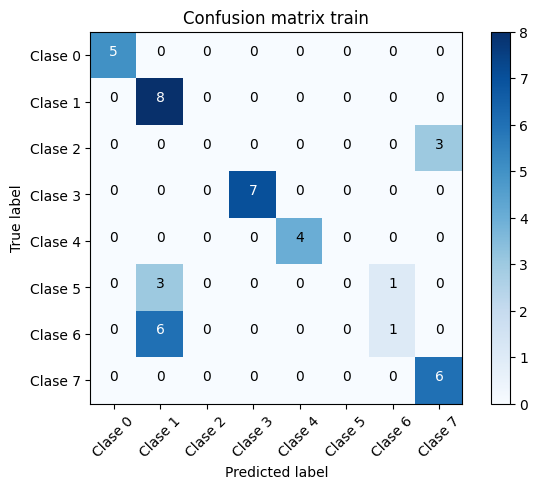

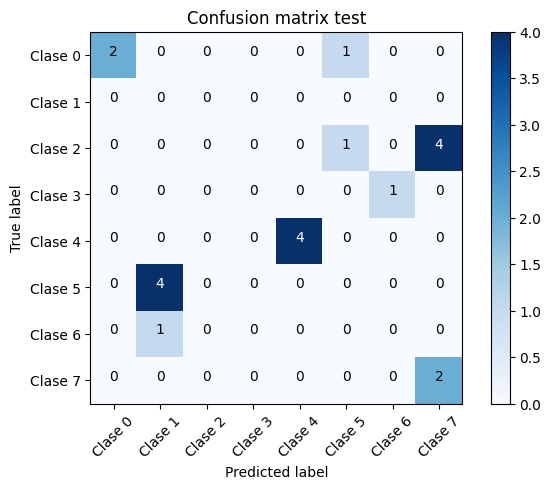

In [104]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
                    
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [105]:
# Calcula la matriz de confusión y el informe de clasificación para el conjunto de entrenamiento
print("Training Set:")
mc_train = confusion_matrix(y_train, predict_train)
cr_train = classification_report(y_train, predict_train, target_names=target_names)

print("Classification Report (Train):")
print(cr_train)

# Calcula la matriz de confusión y el informe de clasificación para el conjunto de prueba
print("\nTest Set:")
mc_test = confusion_matrix(y_test, predict_test)
cr_test = classification_report(y_test, predict_test, target_names=target_names)

print("Classification Report (Test):")
print(cr_test)

Training Set:
Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.47      1.00      0.64         8
     Clase 2       0.00      0.00      0.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       0.00      0.00      0.00         4
     Clase 6       0.50      0.14      0.22         7
     Clase 7       0.67      1.00      0.80         6

    accuracy                           0.70        44
   macro avg       0.58      0.64      0.58        44
weighted avg       0.62      0.70      0.62        44


Test Set:
Classification Report (Test):
              precision    recall  f1-score   support

     Clase 0       1.00      0.67      0.80         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       0.00      0.00      0.00         5
     Clase 3       0.00      0.00      0.00   

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

El primer modelo implementado tiene 70% de accuracy con los datos de entrenamiento y 40% con los datos de prueba, lo que seran nuestro punto de partida para el mejoramiento de la clasificación , cabe resaltar que es muy coherente el resultado ya que el accuracy disminuye en los datos de pruba respcto a los de entrenamiento.

Primera Variación del modelo ( Aumento de 2 neuronas por capa).

In [106]:
#Three hidden layer each layer with eigth neurons
mlp2 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=1000)
print(mlp2)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)


In [107]:
mlp2.fit(X_train,y_train)

predict_train = mlp2.predict(X_train)
predict_test = mlp2.predict(X_test)
#%% Results
print(confusion_matrix(y_train,predict_train))

[[5 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 1 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 5 0 0 0 0 2 0]
 [0 0 0 5 0 0 0 1]]


c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
target_names = ['Clase 0', 'Clase 1','Clase 2','Clase 3','Clase 4','Clase 5','Clase 6','Clase 7']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.58      0.88      0.70         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       0.58      1.00      0.74         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      1.00      1.00         4
     Clase 6       0.67      0.29      0.40         7
     Clase 7       1.00      0.17      0.29         6

    accuracy                           0.75        44
   macro avg       0.85      0.79      0.77        44
weighted avg       0.80      0.75      0.71        44



In [109]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00         1
     Clase 4       0.67      1.00      0.80         4
     Clase 5       1.00      1.00      1.00         4
     Clase 6       0.00      0.00      0.00         1
     Clase 7       0.00      0.00      0.00         2

    accuracy                           0.75        20
   macro avg       0.46      0.47      0.46        20
weighted avg       0.73      0.75      0.73        20



c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [110]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 1 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 5 0 0 0 0 2 0]
 [0 0 0 5 0 0 0 1]]
Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 4 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0]]


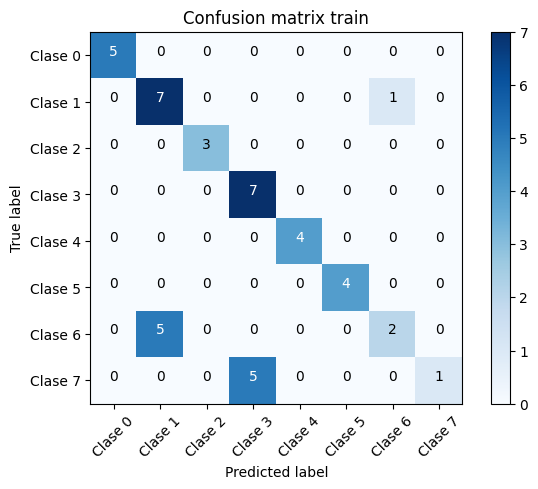

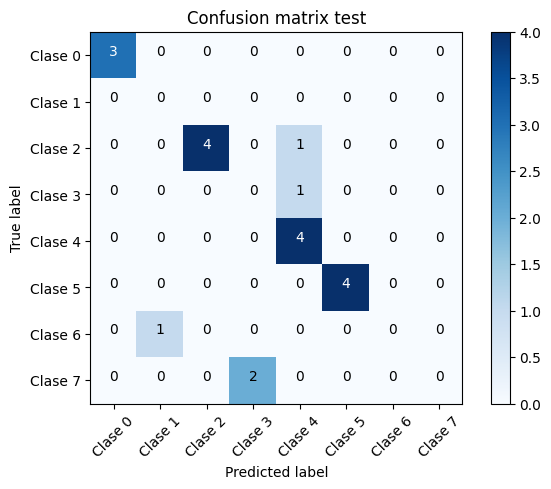

In [111]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
            
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [112]:
# Calcula la matriz de confusión y el informe de clasificación para el conjunto de entrenamiento
print("Training Set:")
mc_train = confusion_matrix(y_train, predict_train)
cr_train = classification_report(y_train, predict_train, target_names=target_names)

print("Classification Report (Train):")
print(cr_train)

# Calcula la matriz de confusión y el informe de clasificación para el conjunto de prueba
print("\nTest Set:")
mc_test = confusion_matrix(y_test, predict_test)
cr_test = classification_report(y_test, predict_test, target_names=target_names)

print("Classification Report (Test):")
print(cr_test)

Training Set:
Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.58      0.88      0.70         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       0.58      1.00      0.74         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      1.00      1.00         4
     Clase 6       0.67      0.29      0.40         7
     Clase 7       1.00      0.17      0.29         6

    accuracy                           0.75        44
   macro avg       0.85      0.79      0.77        44
weighted avg       0.80      0.75      0.71        44


Test Set:
Classification Report (Test):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00   

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Este modelo tiene una mejora significativa en el accuracy 75% en los datos de entrenameinto y 75% en los datos de pruba es decir 5% mas en el accuracy de entrenamiento y 35% mas en el de prueba, el accuracy en los datos de entrenamiento y prueba pueden ser un indicio de sobreajuste del modelo.


Segunda Variación del modelo ( Aumento de 4 neuronas por capa)

In [113]:
#Three hidden layer each layer with eigth neurons
mlp3 = MLPClassifier(hidden_layer_sizes=(12,12,12), activation='relu', solver='adam', max_iter=1000)
print(mlp3)

MLPClassifier(hidden_layer_sizes=(12, 12, 12), max_iter=1000)


In [114]:
mlp3.fit(X_train,y_train)

predict_train = mlp3.predict(X_train)
predict_test = mlp3.predict(X_test)
#%% Results
print(confusion_matrix(y_train,predict_train))

[[5 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 3 0 0 0 1 0 0]
 [0 6 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 6]]


c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
target_names = ['Clase 0', 'Clase 1','Clase 2','Clase 3','Clase 4','Clase 5','Clase 6','Clase 7']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.47      1.00      0.64         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      0.25      0.40         4
     Clase 6       1.00      0.14      0.25         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           0.80        44
   macro avg       0.93      0.80      0.79        44
weighted avg       0.90      0.80      0.76        44



In [116]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      0.67      0.80         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00         1
     Clase 4       0.67      1.00      0.80         4
     Clase 5       0.00      0.00      0.00         4
     Clase 6       0.00      0.00      0.00         1
     Clase 7       1.00      1.00      1.00         2

    accuracy                           0.60        20
   macro avg       0.46      0.43      0.44        20
weighted avg       0.63      0.60      0.60        20



c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [117]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 3 0 0 0 1 0 0]
 [0 6 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 6]]
Confusion matrix, without normalization
[[2 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 4 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]]


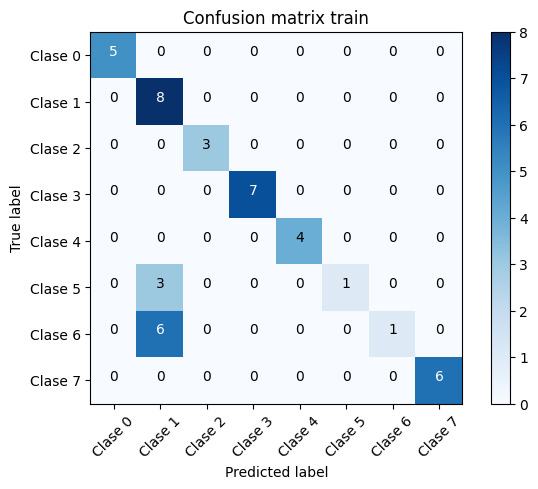

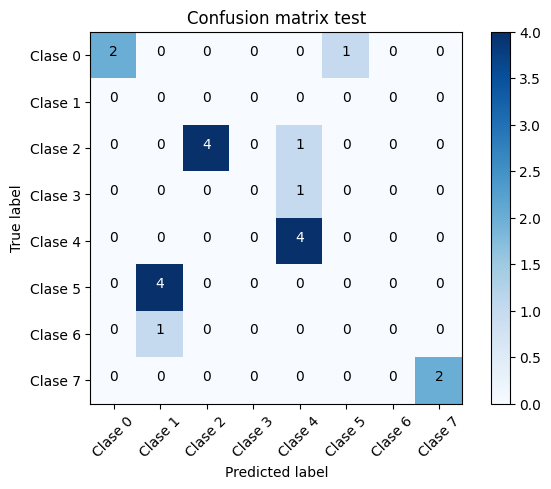

In [118]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
            
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [119]:
# Calcula la matriz de confusión y el informe de clasificación para el conjunto de entrenamiento
print("Training Set:")
mc_train = confusion_matrix(y_train, predict_train)
cr_train = classification_report(y_train, predict_train, target_names=target_names)

print("Classification Report (Train):")
print(cr_train)

# Calcula la matriz de confusión y el informe de clasificación para el conjunto de prueba
print("\nTest Set:")
mc_test = confusion_matrix(y_test, predict_test)
cr_test = classification_report(y_test, predict_test, target_names=target_names)

print("Classification Report (Test):")
print(cr_test)

Training Set:
Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.47      1.00      0.64         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      0.25      0.40         4
     Clase 6       1.00      0.14      0.25         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           0.80        44
   macro avg       0.93      0.80      0.79        44
weighted avg       0.90      0.80      0.76        44


Test Set:
Classification Report (Test):
              precision    recall  f1-score   support

     Clase 0       1.00      0.67      0.80         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00   

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Esta variante del modelo mejoro el accuracy en un 80% en los datos de entrenamiento y 60% en los de prueba , si bien es mas bajo que el modelo anterior cumple con lo esperado respecto al accuracy de los datos de entrenamiento del mismo modelo.
Mejoro 5% respecto al modelo anterior y 20% respecto al original, minetras que en los datos de prueba mejoro 20% respecto al original pero disminuyo 15% respecto al anterior.

Tercera variación (cambiamos la activación ('relu' por 'tanh')y mantenemos los parametrros del modelo original(primer modelo)).


In [120]:
#Three hidden layer each layer with eigth neurons
mlp4 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='tanh', solver='adam', max_iter=1000)
print(mlp4)

MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 8, 8), max_iter=1000)


In [121]:
mlp4.fit(X_train,y_train)

predict_train = mlp4.predict(X_train)
predict_test = mlp4.predict(X_test)
#%% Results
print(confusion_matrix(y_train,predict_train))

[[5 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 3 0 0 0 1 0 0]
 [0 6 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 6]]


c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [122]:
target_names = ['Clase 0', 'Clase 1','Clase 2','Clase 3','Clase 4','Clase 5','Clase 6','Clase 7']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.47      1.00      0.64         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       0.50      0.25      0.33         4
     Clase 6       0.00      0.00      0.00         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           0.77        44
   macro avg       0.75      0.78      0.75        44
weighted avg       0.70      0.77      0.71        44



c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [123]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       0.75      1.00      0.86         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00         1
     Clase 4       0.80      1.00      0.89         4
     Clase 5       0.00      0.00      0.00         4
     Clase 6       0.00      0.00      0.00         1
     Clase 7       1.00      1.00      1.00         2

    accuracy                           0.65        20
   macro avg       0.44      0.47      0.45        20
weighted avg       0.62      0.65      0.63        20



c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [124]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 3 0 0 0 1 0 0]
 [0 6 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 6]]
Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]]


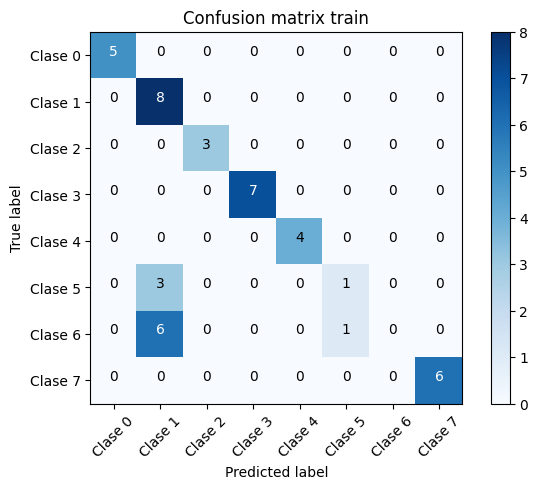

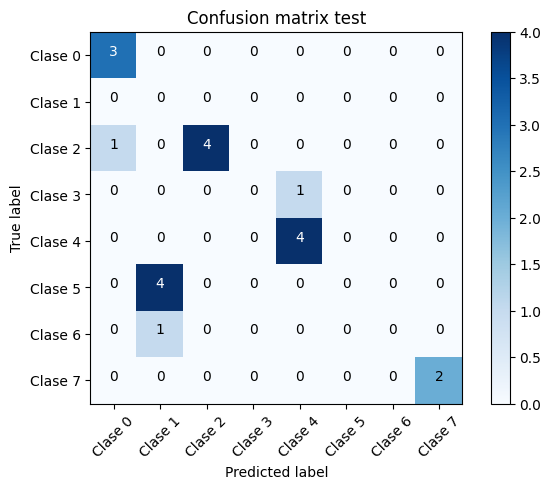

In [125]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
            
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [126]:
# Calcula la matriz de confusión y el informe de clasificación para el conjunto de entrenamiento
print("Training Set:")
mc_train = confusion_matrix(y_train, predict_train)
cr_train = classification_report(y_train, predict_train, target_names=target_names)

print("Classification Report (Train):")
print(cr_train)

# Calcula la matriz de confusión y el informe de clasificación para el conjunto de prueba
print("\nTest Set:")
mc_test = confusion_matrix(y_test, predict_test)
cr_test = classification_report(y_test, predict_test, target_names=target_names)

print("Classification Report (Test):")
print(cr_test)

Training Set:
Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.47      1.00      0.64         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       0.50      0.25      0.33         4
     Clase 6       0.00      0.00      0.00         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           0.77        44
   macro avg       0.75      0.78      0.75        44
weighted avg       0.70      0.77      0.71        44


Test Set:
Classification Report (Test):
              precision    recall  f1-score   support

     Clase 0       0.75      1.00      0.86         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00   

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Este modelo tuvo un accuracy del 77% en los datos de entrenamiento es decir 7% mas que el orignal y 3% menos que el modelo que mejor se ha comportado en esa categoria, mientras que en los datos de prueba tuvo 65% es decir 25% mas que el original y 10% menos que el mejor modelo hasta el momento en esta categoria.

Cuarta Variaición mantenemos la ultima función de activación utilizada (tanh) y apolicamos el numero de neuronas del modleo que mejor desempeño ha tenido.

In [127]:
#Three hidden layer each layer with eigth neurons
mlp5 = MLPClassifier(hidden_layer_sizes=(12,12,12), activation='tanh', solver='adam', max_iter=1000)
print(mlp5)

MLPClassifier(activation='tanh', hidden_layer_sizes=(12, 12, 12), max_iter=1000)


In [128]:
mlp5.fit(X_train,y_train)

predict_train = mlp5.predict(X_train)
predict_test = mlp5.predict(X_test)
#%% Results
print(confusion_matrix(y_train,predict_train))

[[5 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 1 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 2 0 0 0 1 1 0]
 [0 5 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 6]]


c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
target_names = ['Clase 0', 'Clase 1','Clase 2','Clase 3','Clase 4','Clase 5','Clase 6','Clase 7']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.50      0.88      0.64         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      0.25      0.40         4
     Clase 6       0.50      0.29      0.36         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           0.80        44
   macro avg       0.88      0.80      0.80        44
weighted avg       0.83      0.80      0.78        44



In [130]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       0.75      1.00      0.86         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00         1
     Clase 4       1.00      1.00      1.00         4
     Clase 5       0.00      0.00      0.00         4
     Clase 6       0.00      0.00      0.00         1
     Clase 7       1.00      1.00      1.00         2

    accuracy                           0.65        20
   macro avg       0.47      0.47      0.47        20
weighted avg       0.66      0.65      0.65        20



c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [131]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 1 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 2 0 0 0 1 1 0]
 [0 5 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 6]]
Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 4 1 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]]


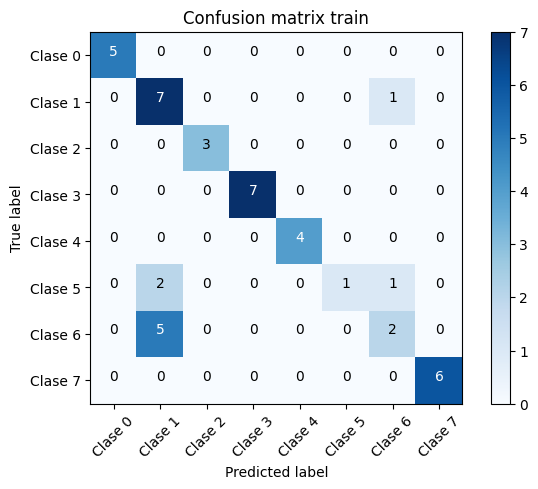

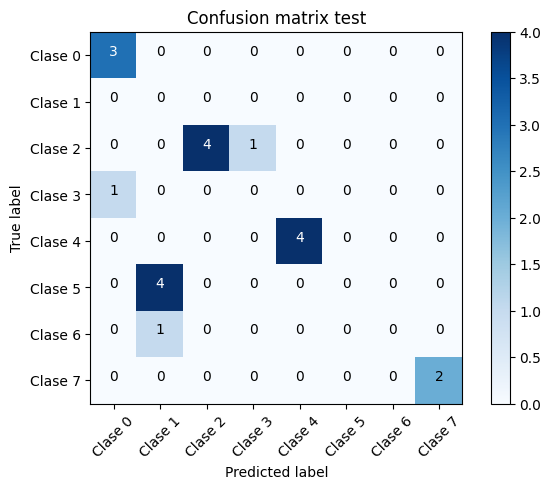

In [132]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')
            
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

In [133]:
# Calcula la matriz de confusión y el informe de clasificación para el conjunto de entrenamiento
print("Training Set:")
mc_train = confusion_matrix(y_train, predict_train)
cr_train = classification_report(y_train, predict_train, target_names=target_names)

print("Classification Report (Train):")
print(cr_train)

# Calcula la matriz de confusión y el informe de clasificación para el conjunto de prueba
print("\nTest Set:")
mc_test = confusion_matrix(y_test, predict_test)
cr_test = classification_report(y_test, predict_test, target_names=target_names)

print("Classification Report (Test):")
print(cr_test)

Training Set:
Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.50      0.88      0.64         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      0.25      0.40         4
     Clase 6       0.50      0.29      0.36         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           0.80        44
   macro avg       0.88      0.80      0.80        44
weighted avg       0.83      0.80      0.78        44


Test Set:
Classification Report (Test):
              precision    recall  f1-score   support

     Clase 0       0.75      1.00      0.86         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      0.80      0.89         5
     Clase 3       0.00      0.00      0.00   

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Esta ultima variación tuvo 80% de accuracy en entrenamiento y 65% en los datos de prueba, no represento una majeora respecto a los modelos anteriores.

¿Cual fue el mejor modelo?

El modelo que mejor desempeño tuvo fue la cuarta variación teniendo en cuenta el accuracy obtenido tanto en la prueba como en el entrenamiento y que entre estos este una diferencia notable a favor de los datos de entrenamiento.

**f. (25%) Consultar (10%), justificar el uso (5%) e implementar otros modelos de machine learning que permitan la clasificación de gestos (10%)**

**_Support Vector Machines_**
Las máquinas de vectores de soporte (SVM) son un conjunto de métodos de de aprendizaje automático​ ​que se utilizan para la clasificación , la regresión y la detección de valores. Estas máquinas admiten vectores de muestra densos y dispersos.
Las máquinas de vectores de soporte (SVM) ofrecen varias ventajas:

- Son efectivas en espacios con muchas dimensiones.
- Funcionan bien incluso cuando el número de dimensiones es mayor que el número de muestras.
- Utilizan solo un subconjunto de los puntos de entrenamiento, llamados vectores de soporte, para la función de decisión, lo que las hace eficientes en el uso de memoria.
- Son versátiles: permiten la especificación de diferentes funciones de kernel para la función de decisión. Además de los kernels comunes disponibles, también es posible definir kernels personalizados.
Las desventajas:

- Cuando el número de características es significativamente mayor que el número de muestras, es fundamental evitar el sobreajuste seleccionando cuidadosamente las funciones del kernel y el término de regularización.
- Las SVM no generan estimaciones de probabilidad de manera directa; estas deben calcularse utilizando una validación cruzada quíntuple, lo cual es un proceso costoso (ver la sección sobre Puntuaciones y probabilidades).

Función en python svm.NuSVC usa un parámetro para controlar la cantidad de vectores de soporte.
Parametrosd de entrdada de la función: 

svm. NuSVC ( * , nu = 0.5 , kernel = 'rbf' , grado = 3 , gamma = 'escala' , coef0 = 0.0 , reducción = Verdadero , probabilidad = Falso , tol = 0.001 , tamaño_caché = 200 , peso_clase = Ninguno , detallado = Falso , max_iter = -1 , decisión_función_forma = 'ovr' , break_ties = Falso , estado_aleatorio = Ninguno )
Descripción de algunos parámetros: 
- nu (flotante, por defecto 0.5): Define el límite superior de la fracción de errores de margen y el límite inferior de la fracción de vectores de soporte. Debe estar en el rango (0, 1).

- kernel ({'lineal', 'poly', 'rbf', 'sigmoide', 'precalculado'} o invocable, por defecto 'rbf'): Especifica el tipo de núcleo a usar en el algoritmo. Si no se especifica, se utiliza 'rbf'. Un invocable puede ser usado para precalcular la matriz del núcleo.

grado (int, por defecto 3): Es el grado del kernel polinomial ('poly'). Debe ser no negativo y es ignorado por los demás núcleos.

- gamma ({'escala', 'auto'} o flotante, por defecto 'escala'): Es el coeficiente del kernel para 'rbf', 'poly' y 'sigmoide'.

Si gamma='scale', se usa 1 / (n_features * X.var()).
Si gamma='auto', se usa 1/n_features.
Si es un valor flotante, no debe ser negativo [13].


In [136]:
# Aplicación del modelo
from sklearn import svm

clf = svm.NuSVC(gamma='auto')
clf.fit(X_train,y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

target_names = ['Clase 0', 'Clase 1','Clase 2','Clase 3','Clase 4','Clase 5','Clase 6','Clase 7']

print(classification_report(y_train,predict_train,target_names=target_names))

print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       0.43      0.38      0.40         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      0.75      0.86         4
     Clase 6       0.44      0.57      0.50         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           0.80        44
   macro avg       0.86      0.84      0.84        44
weighted avg       0.81      0.80      0.80        44

              precision    recall  f1-score   support

     Clase 0       1.00      0.67      0.80         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      1.00      1.00         5
     Clase 3       1.00      1.00      1.00         1
     Clase 4       1.00      1.00      1.00         4
     Clase 5       0.67 

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [137]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 5 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 1 0 0 0 3 0 0]
 [0 3 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 6]]
Confusion matrix, without normalization
[[2 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 2 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 2]]


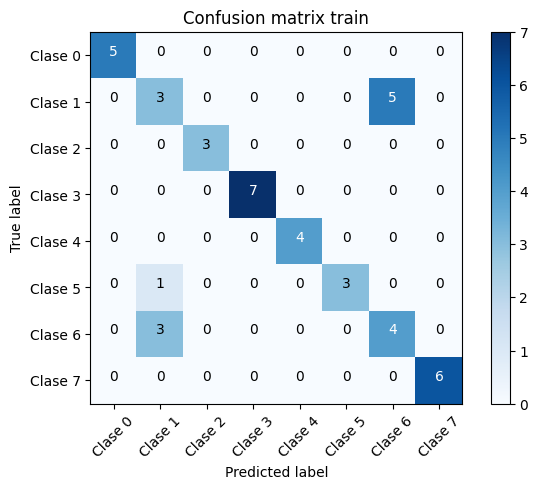

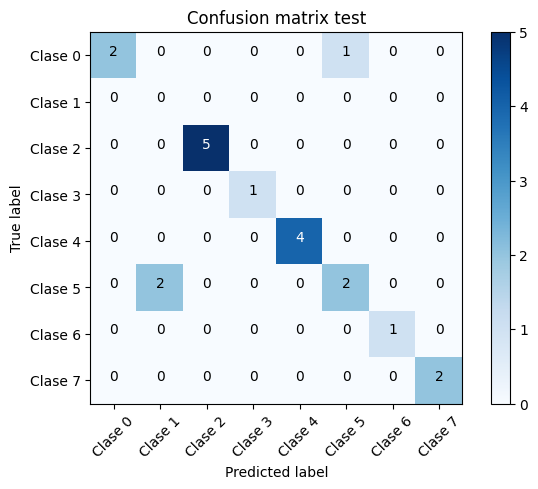

In [138]:
# Matriz de confusión para el conjunto de entrenamiento
mc_train = confusion_matrix(y_train, predict_train)
plot_confusion_matrix(mc_train, classes=target_names, title="Confusion matrix train")

# Matriz de confusión para el conjunto de prueba
mc_test = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(mc_test, classes=target_names, title="Confusion matrix test")

**_Decision Trees_** (Los árboles de decisión (DT))


Son un método de aprendizaje supervisado no paramétrico utilizado para clasificación y regresión. El objetivo es construir un modelo que prediga el valor de una variable objetivo mediante el aprendizaje de reglas de decisión simples derivadas de las características de los datos. Un árbol puede considerarse como una aproximación por tramos constantes

Ventajas:
- El costo de predecir datos es logarítmico en relación con el número de puntos de datos utilizados para entrenar el árbol.
- A diferencia de otras técnicas, no es necesario normalizar datos, crear variables ficticias ni eliminar valores en blanco. Algunas combinaciones de árboles y algoritmos pueden manejar valores faltantes.
- Pueden resolver problemas donde hay más de una variable objetivo.
- Las decisiones y condiciones del modelo se explican fácilmente mediante lógica booleana, a diferencia de los modelos de caja negra como las redes neuronales artificiales, que son más difíciles de interpretar

Parámetros de entrada : class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None).

Descripción de algunos parámetros (los más empleados) 

- criterion: Define la función para medir la calidad de una división. Las opciones son:

"squared_error" (predeterminado): Utiliza el error cuadrático medio, que minimiza la pérdida L2 usando la media de cada nodo terminal.

"friedman_mse": Usa el error cuadrático medio con la puntuación de mejora de Friedman.

"absolute_error": Utiliza el error absoluto medio, que minimiza la pérdida L1 usando la mediana de cada nodo terminal.

"poisson": Usa la reducción de la desviación de Poisson para encontrar divisiones.

- random_state: Controla la aleatoriedad del estimador. Las características siempre se permutan aleatoriamente en cada división. Si no se especifica, el algoritmo selecciona divisiones aleatoriamente, lo que puede llevar a resultados diferentes en cada ejecución si varias divisiones tienen la misma calidad. Para un comportamiento determinista, se debe establecer en un número entero.[14]




Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         5
     Clase 1       1.00      1.00      1.00         8
     Clase 2       1.00      1.00      1.00         3
     Clase 3       1.00      1.00      1.00         7
     Clase 4       1.00      1.00      1.00         4
     Clase 5       1.00      1.00      1.00         4
     Clase 6       1.00      1.00      1.00         7
     Clase 7       1.00      1.00      1.00         6

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Classification Report (Test):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00         3
     Clase 1       0.00      0.00      0.00         0
     Clase 2       1.00      1.00      1.00         5
     Clase 3       1.00      1.00      1.00         1
     Clase 4     

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

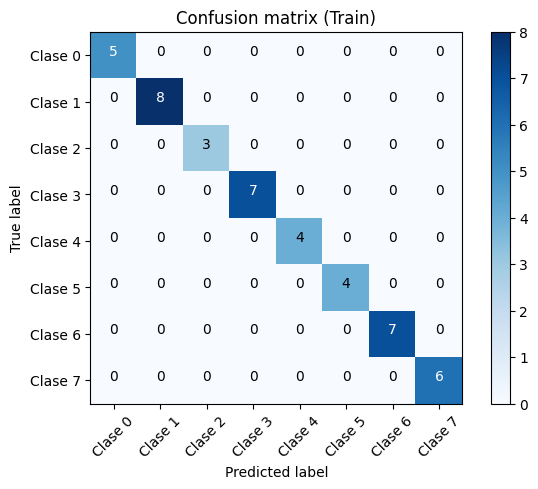

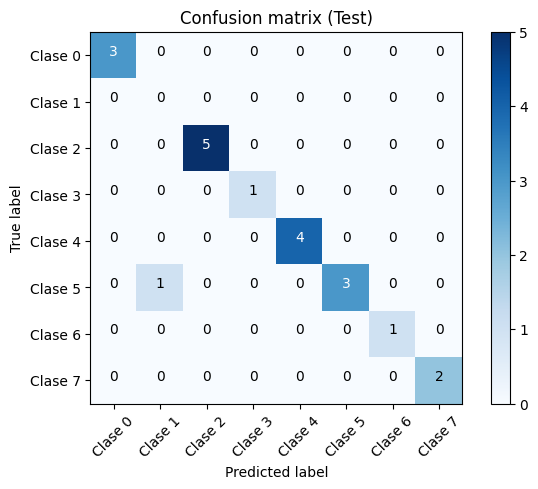

In [139]:
#Aplicación del modelo
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=40)
clf.fit(X_train, y_train)

# Hacer predicciones
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Definir los nombres de las clases (reemplaza con tus nombres de clases)
target_names = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6', 'Clase 7']

# Imprimir los reportes de clasificación
print("Classification Report (Train):")
print(classification_report(y_train, predict_train, target_names=target_names))

print("Classification Report (Test):")
print(classification_report(y_test, predict_test, target_names=target_names))

# Función para plotear la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y dibuja la matriz de confusión.
    La normalización se puede aplicar estableciendo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, predict_train)
plot_confusion_matrix(cm_train, classes=target_names, title='Confusion matrix (Train)')

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm_test, classes=target_names, title='Confusion matrix (Test)')

plt.show()


**g. (15%) Discutir cómo se podría implementar la solución del punto e y f usando sistemas embebidos seleccionando el tipo de microcontrolador (5%) y los posibles tiempos de adquisición y clasificación de las señales (10%)**

Para la Implementación en sistemas embebidos hay que tener en cuenta la capacidad de procesamiento y memoria disponbible para ejecutar los modelos,el tiempo de adquisición debe ser lo suficientemente corto para captar los gestos de manera efectiva, pero lo suficientemente largo para obtener una buena resolución temporal.
El tiempo de clasificación depende de la complejidad del modelo de machine learning y la capacidad del microcontrolador. Modelos más simples como árboles de decisión o SVM pueden clasificarse rápidamente en comparación con redes neuronales profundas o mucho ams complejas ademas se pueden utilizar optimizaciones como la cuantización del modelo para reducir el tamaño y la complejidad de los cálculos, haciéndolos más adecuados para sistemas embebidos.
Existen bibliotecas optimizadas para microcontroladores como TensorFlow Lite for Microcontrollers que permite ejecutar modelos de machine learning en dispositivos con recursos limitados y se debe tener en cuenta Convertir y cuantizar el modelo entrenado en una plataforma más potente (como una PC) antes de desplegarlo en el microcontrolador.

**<p align="center">Referencia Biblográfica</p>**

[1] D. Staudenmann et al., "Increasing signal quality of surface electromyograms using filtering techniques," Eur. J. Transl. Myol., vol. 28, no. 2, pp. 147–158, 2018.

[2] S. Konrad, "The EMG-Toolkit,"Signal Process. Mag., vol. 23, no. 3, pp. 60–73, 2006.

[3] J. R. Cram and G. S. Kasman, "Introduction to Surface Electromyography," Aspen Publishers, 1998.
[4] IEEE Standard for Digital Filters Used in Industrial Control Systems,Std 1057-1994.

[5] D. F. Stegeman et al., "The singular value decomposition for processing surface EMG signals," J. Electromyogr. Kinesiol., vol. 30, pp. 1–7, 2016.

[6] J. G. Proakis and D. G. Manolakis, "Digital Signal Processing: Principles, Algorithms, and Applications," Prentice Hall, 1996.

[7] A. Phinyomark et al., "EMG signal processing for muscle force estimation," EMG Methods Eval. Muscle Force, pp. 81–107, 2020.

[8] T. Hettinga et al., "A novel filtering technique for surface electromyography," J. Electromyogr. Kinesiol., vol. 48, pp. 57–64, 2019.

[9] L. R. Rabiner and B. Gold, "Theory and Application of Digital Signal Processing," Prentice Hall, 1975.

[10] J. R. Cram and G. S. Kasman, "Introduction to Surface Electromyography," Aspen Publishers, 1998.

[11] Oracle. "IQR (Rango intercuartílico)" pp. 389. [Online]. https://docs.oracle.com/cloud/help/es/pbcs_common/PFUSU/insights_metrics_IQR.htm#PFUSU-GUID-CF37CAEA-730B-4346-801E-64612719FF6B

[12] Scikit-learn (s.f) _MLPClassifier_ [online] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

[13] Scikit-learn (s.f) _NuSVC_ [Online] https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html

[14] Scikit-learn (s.f) _DecisionTreeRegressor_ [Online] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

[15] https://www.tensorflow.org/lite/microcontrollers?hl=es-419